# Comparative Study of Different Machine Learning Algorithms on P2P Loan Lending Organization’s Dataset to Predict the Loan Defaulters

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np


import catboost 
import xgboost
import optuna

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.pyplot as plt 

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

import sklearn
#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

#plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 60
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

In [3]:
# plt.rcParams.keys() 

In [4]:
import gc
gc.collect() 

82

In [5]:
data = pd.read_csv('data_completely_cleaned_final.csv', low_memory=False)
pd.set_option('display.max_columns', None)

In [6]:
data 

,Unnamed: 0,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Amount,Interest,MonthlyPayment,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,Restructured,PrincipalPaymentsMade,PrincipalBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,NrOfScheduledPayments,IsDefault,ApplicationSignedHour_1,ApplicationSignedHour_2,ApplicationSignedHour_3,ApplicationSignedHour_4,ApplicationSignedHour_5,ApplicationSignedHour_6,ApplicationSignedHour_7,ApplicationSignedHour_8,ApplicationSignedHour_9,ApplicationSignedHour_10,ApplicationSignedHour_11,ApplicationSignedHour_12,ApplicationSignedHour_13,ApplicationSignedHour_14,ApplicationSignedHour_15,ApplicationSignedHour_16,ApplicationSignedHour_17,ApplicationSignedHour_18,ApplicationSignedHour_19,ApplicationSignedHour_20,ApplicationSignedHour_21,ApplicationSignedHour_22,ApplicationSignedHour_23,ApplicationSignedWeekday_2,ApplicationSignedWeekday_3,ApplicationSignedWeekday_4,ApplicationSignedWeekday_5,ApplicationSignedWeekday_6,ApplicationSignedWeekday_7,VerificationType_Incomeunverified,VerificationType_Incomeunverifiedcrossreferencedbyphone,VerificationType_Incomeverified,LanguageCode_2,LanguageCode_3,LanguageCode_4,LanguageCode_5,LanguageCode_6,LanguageCode_7,LanguageCode_9,LanguageCode_10,LanguageCode_13,LanguageCode_15,LanguageCode_21,LanguageCode_22,Gender_Male,Gender_Others,Country_ES,Country_FI,Country_SK,LoanDuration_2,LoanDuration_3,LoanDuration_4,LoanDuration_5,LoanDuration_6,LoanDuration_7,LoanDuration_8,LoanDuration_9,LoanDuration_10,LoanDuration_11,LoanDuration_12,LoanDuration_13,LoanDuration_14,LoanDuration_15,LoanDuration_16,LoanDuration_17,LoanDuration_18,LoanDuration_19,LoanDuration_20,LoanDuration_21,LoanDuration_22,LoanDuration_24,LoanDuration_27,LoanDuration_30,LoanDuration_36,LoanDuration_38,LoanDuration_42,LoanDuration_48,LoanDuration_52,LoanDuration_54,LoanDuration_60,UseOfLoan_0,UseOfLoan_1,UseOfLoan_2,UseOfLoan_3,UseOfLoan_4,UseOfLoan_5,UseOfLoan_6,UseOfLoan_7,UseOfLoan_8,Education_Highereducation,Education_Primaryeducation,Education_Secondaryeducation,Education_Vocationaleducation,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,EmploymentStatus_Fullyemployed,EmploymentStatus_Partiallyemployed,EmploymentStatus_Retiree,EmploymentStatus_Selfemployed,EmploymentStatus_Unemployed,EmploymentDurationCurrentEmployer_Other,EmploymentDurationCurrentEmployer_Retiree,EmploymentDurationCurrentEmployer_TrialPeriod,EmploymentDurationCurrentEmployer_UpTo1Year,EmploymentDurationCurrentEmployer_UpTo2Years,EmploymentDurationCurrentEmployer_UpTo3Years,EmploymentDurationCurrentEmployer_UpTo4Years,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_Agricultureforestryandfishing,OccupationArea_Artandentertainment,OccupationArea_Civilservicemilitary,OccupationArea_Construction,OccupationArea_Education,OccupationArea_Energy,OccupationArea_Financeandinsurance,OccupationArea_Healthcareandsocialhelp,OccupationArea_Hospitalityandcatering,OccupationArea_Infoandtelecom,OccupationArea_Mining,OccupationArea_Other,OccupationArea_Processing,OccupationArea_Realestate,OccupationArea_Research,OccupationArea_Retailandwholesale,OccupationArea_Transportandwarehousing,OccupationArea_Utilities,HomeOwnershipType_Homeless,HomeOwnershipType_Jointownership,HomeOwnershipType_Jointtenant,HomeOwnershipType_Livingwithparents,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Ownerwithencumbrance,HomeOwnershipType_Tenantprefurnishedproperty,HomeOwnershipType_Tenantunfurnishedproperty,Rating_AA,Rating_B,Rating_C,Rating_D,Rating_E,Rating_F,Rating_HR,Status_Repaid,CreditScoreEeMini_6000,CreditScoreEeMini_7000,CreditScoreEeMini_8000,CreditScoreEeMini_9000,CreditScoreEeMi

In [7]:
data = data.drop(columns = 'Unnamed: 0', axis = 1) 

In [8]:
sorted(data.columns)

['ActiveLateLastPaymentCategory_121150',
 'ActiveLateLastPaymentCategory_151180',
 'ActiveLateLastPaymentCategory_1630',
 'ActiveLateLastPaymentCategory_180',
 'ActiveLateLastPaymentCategory_3160',
 'ActiveLateLastPaymentCategory_6190',
 'ActiveLateLastPaymentCategory_815',
 'ActiveLateLastPaymentCategory_91120',
 'ActiveScheduleFirstPaymentReached',
 'Age_range__2025',
 'Age_range__2530',
 'Age_range__3035',
 'Age_range__3540',
 'Age_range__4045',
 'Age_range__4550',
 'Age_range__5055',
 'Age_range__5560',
 'Age_range__6065',
 'Age_range__6570',
 'Age_range__7075',
 'Age_range__7580',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour_1',
 'ApplicationSignedHour_10',
 'ApplicationSignedHour_11',
 'ApplicationSignedHour_12',
 'ApplicationSignedHour_13',
 'ApplicationSignedHour_14',
 'ApplicationSignedHour_15',
 'ApplicationSignedHour_16',
 'ApplicationSignedHour_17',
 'ApplicationSignedHour_18',
 'ApplicationSignedHour_19',
 'ApplicationSignedHour_2',
 'ApplicationS

In [9]:
data['IsDefault'] 

0             Defaulter
1             Defaulter
2         Non-Defaulter
3         Non-Defaulter
4             Defaulter
              ...      
115994        Defaulter
115995        Defaulter
115996    Non-Defaulter
115997    Non-Defaulter
115998    Non-Defaulter
Name: IsDefault, Length: 115999, dtype: object

In [10]:
data['IsDefault']  = data['IsDefault'].replace('Defaulter', 1)
data['IsDefault']  = data['IsDefault'].replace('Non-Defaulter', 0)

In [11]:
data['IsDefault'] 

0         1
1         1
2         0
3         0
4         1
         ..
115994    1
115995    1
115996    0
115997    0
115998    0
Name: IsDefault, Length: 115999, dtype: int64

## Train_test_split

In [12]:
all_columns = data.columns

In [13]:
X = data.drop(columns = 'IsDefault', axis = 1)
y = data['IsDefault']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [15]:
plt.rcParams.update({'font.size': 16})

In [16]:


# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50)
# rfe = rfe.fit(X, y)

# for i in range(X.shape[1]):
#     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((81199, 296), (34800, 296), (81199,), (34800,))

In [20]:
# from imblearn.over_sampling import SMOTE

# # Separate input features and target
# # y = df.Class
# # X = df.drop('Class', axis=1)

# # # setting up testing and training sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# sm = SMOTE(random_state=27, sampling_strategy=1)
# X_train, y_train = sm.fit_sample(X_train, y_train)

In [21]:
from sklearn.utils import resample

# Separate input features and target


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.shape



(86999, 297)

In [22]:
# separate minority and majority classes
not_default = X[X.IsDefault==0]
default = X[X.IsDefault==1]

# upsample minority
not_default_upsampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=len(default), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([default, not_default_upsampled])

# check new class counts
upsampled.IsDefault.value_counts()
#     1    213245
#     0    213245

1    51700
0    51700
Name: IsDefault, dtype: int64

In [23]:
upsampled

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Amount,Interest,MonthlyPayment,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,Restructured,PrincipalPaymentsMade,PrincipalBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,NrOfScheduledPayments,ApplicationSignedHour_1,ApplicationSignedHour_2,ApplicationSignedHour_3,ApplicationSignedHour_4,ApplicationSignedHour_5,ApplicationSignedHour_6,ApplicationSignedHour_7,ApplicationSignedHour_8,ApplicationSignedHour_9,ApplicationSignedHour_10,ApplicationSignedHour_11,ApplicationSignedHour_12,ApplicationSignedHour_13,ApplicationSignedHour_14,ApplicationSignedHour_15,ApplicationSignedHour_16,ApplicationSignedHour_17,ApplicationSignedHour_18,ApplicationSignedHour_19,ApplicationSignedHour_20,ApplicationSignedHour_21,ApplicationSignedHour_22,ApplicationSignedHour_23,ApplicationSignedWeekday_2,ApplicationSignedWeekday_3,ApplicationSignedWeekday_4,ApplicationSignedWeekday_5,ApplicationSignedWeekday_6,ApplicationSignedWeekday_7,VerificationType_Incomeunverified,VerificationType_Incomeunverifiedcrossreferencedbyphone,VerificationType_Incomeverified,LanguageCode_2,LanguageCode_3,LanguageCode_4,LanguageCode_5,LanguageCode_6,LanguageCode_7,LanguageCode_9,LanguageCode_10,LanguageCode_13,LanguageCode_15,LanguageCode_21,LanguageCode_22,Gender_Male,Gender_Others,Country_ES,Country_FI,Country_SK,LoanDuration_2,LoanDuration_3,LoanDuration_4,LoanDuration_5,LoanDuration_6,LoanDuration_7,LoanDuration_8,LoanDuration_9,LoanDuration_10,LoanDuration_11,LoanDuration_12,LoanDuration_13,LoanDuration_14,LoanDuration_15,LoanDuration_16,LoanDuration_17,LoanDuration_18,LoanDuration_19,LoanDuration_20,LoanDuration_21,LoanDuration_22,LoanDuration_24,LoanDuration_27,LoanDuration_30,LoanDuration_36,LoanDuration_38,LoanDuration_42,LoanDuration_48,LoanDuration_52,LoanDuration_54,LoanDuration_60,UseOfLoan_0,UseOfLoan_1,UseOfLoan_2,UseOfLoan_3,UseOfLoan_4,UseOfLoan_5,UseOfLoan_6,UseOfLoan_7,UseOfLoan_8,Education_Highereducation,Education_Primaryeducation,Education_Secondaryeducation,Education_Vocationaleducation,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,EmploymentStatus_Fullyemployed,EmploymentStatus_Partiallyemployed,EmploymentStatus_Retiree,EmploymentStatus_Selfemployed,EmploymentStatus_Unemployed,EmploymentDurationCurrentEmployer_Other,EmploymentDurationCurrentEmployer_Retiree,EmploymentDurationCurrentEmployer_TrialPeriod,EmploymentDurationCurrentEmployer_UpTo1Year,EmploymentDurationCurrentEmployer_UpTo2Years,EmploymentDurationCurrentEmployer_UpTo3Years,EmploymentDurationCurrentEmployer_UpTo4Years,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_Agricultureforestryandfishing,OccupationArea_Artandentertainment,OccupationArea_Civilservicemilitary,OccupationArea_Construction,OccupationArea_Education,OccupationArea_Energy,OccupationArea_Financeandinsurance,OccupationArea_Healthcareandsocialhelp,OccupationArea_Hospitalityandcatering,OccupationArea_Infoandtelecom,OccupationArea_Mining,OccupationArea_Other,OccupationArea_Processing,OccupationArea_Realestate,OccupationArea_Research,OccupationArea_Retailandwholesale,OccupationArea_Transportandwarehousing,OccupationArea_Utilities,HomeOwnershipType_Homeless,HomeOwnershipType_Jointownership,HomeOwnershipType_Jointtenant,HomeOwnershipType_Livingwithparents,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Ownerwithencumbrance,HomeOwnershipType_Tenantprefurnishedproperty,HomeOwnershipType_Tenantunfurnishedproperty,Rating_AA,Rating_B,Rating_C,Rating_D,Rating_E,Rating_F,Rating_HR,Status_Repaid,CreditScoreEeMini_6000,CreditScoreEeMini_7000,CreditScoreEeMini_8000,CreditScoreEeMini_9000,CreditScoreEeMini_10000,PreviousEarl

In [24]:
y = upsampled['IsDefault']
X = upsampled.drop(columns = 'IsDefault', axis = 1)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((72380, 296), (31020, 296), (72380,), (31020,))

## Predictive Modelling

### Logistic Regression


#### Modelling


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_LR = LogisticRegression().fit(X_train, y_train)

In [28]:
y_pred_LR = model_LR.predict(X_test)
#y_pred_LR1 = model_LR.predict(X_train)
LR_confusion_matrix = confusion_matrix(y_test, y_pred_LR).ravel()
#LR_confusion_matrix = confusion_matrix(y_test, y_pred_LR)
LR_confusion_matrix #tn, fp, fn, tp

array([14289,  1285,  1627, 13819], dtype=int64)

#### Evaluation Metrics

In [29]:
metric_LR = {}
metric_LR['model_name'] = 'Logistic Regression'
metric_LR['TN'] = LR_confusion_matrix[0]
metric_LR['FP'] = LR_confusion_matrix[1]
metric_LR['FN'] = LR_confusion_matrix[2]
metric_LR['TP'] = LR_confusion_matrix[3]

metric_LR['model'] = model_LR

In [30]:
metric_LR

{'model_name': 'Logistic Regression',
 'TN': 14289,
 'FP': 1285,
 'FN': 1627,
 'TP': 13819,
 'model': LogisticRegression()}

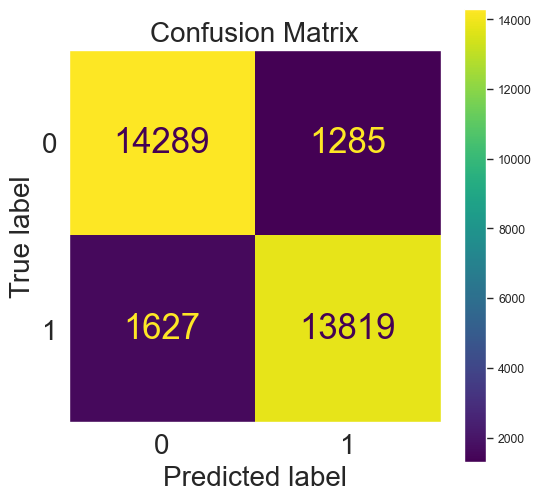

In [31]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_LR, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show() 


##### Accuracy

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LR)

0.9061250805931657

##### Misclassification Rate

In [33]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_LR))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     15574
           1       0.91      0.89      0.90     15446

    accuracy                           0.91     31020
   macro avg       0.91      0.91      0.91     31020
weighted avg       0.91      0.91      0.91     31020



##### Sensitivity

##### Specificity

##### F1 Score

In [34]:
# plt.rcParams['font.size'] = '16'

##### ROC and AUC – Area Under the Curve

In [271]:
from sklearn import metrics
y_pred_proba = model_LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

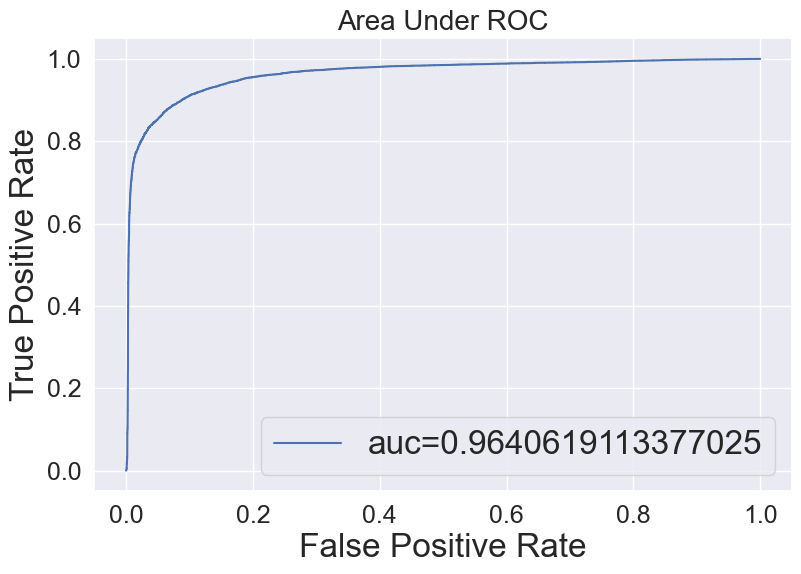

In [272]:
import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [37]:

gc.collect() 

7002

In [38]:
##### ROC and AUC – Area Under the Curve

### Decision Trees

#### Modelling


In [39]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_DT = model_DT.predict(X_test)

In [41]:
DT_confusion_matrix = confusion_matrix(y_test, y_pred_DT).ravel()
DT_confusion_matrix

array([14875,   699,  1213, 14233], dtype=int64)

#### Evaluation Metrics

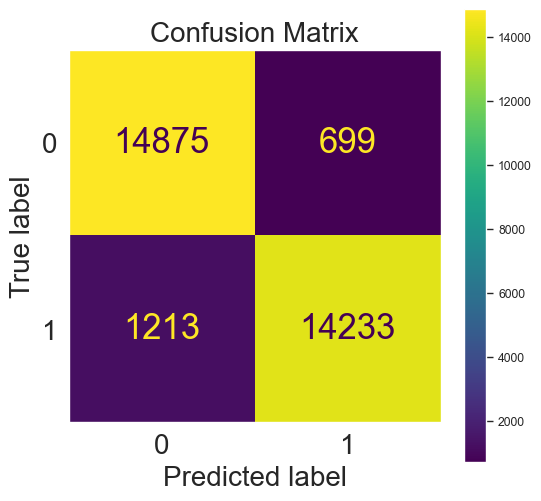

In [42]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_DT, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show() 

In [43]:
metric_DT = {}
metric_DT['model_name'] = 'Decision Trees'
metric_DT['TN'] = DT_confusion_matrix[0]
metric_DT['FP'] = DT_confusion_matrix[1]
metric_DT['FN'] = DT_confusion_matrix[2]
metric_DT['TP'] = DT_confusion_matrix[3]

metric_DT['model'] = model_DT

In [44]:
metric_DT

{'model_name': 'Decision Trees',
 'TN': 14875,
 'FP': 699,
 'FN': 1213,
 'TP': 14233,
 'model': DecisionTreeClassifier()}

##### Accuracy

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)

0.9383623468729851

##### Misclassification Rate

In [46]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_DT))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     15574
           1       0.95      0.92      0.94     15446

    accuracy                           0.94     31020
   macro avg       0.94      0.94      0.94     31020
weighted avg       0.94      0.94      0.94     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [273]:
from sklearn import metrics
y_pred_proba = model_DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

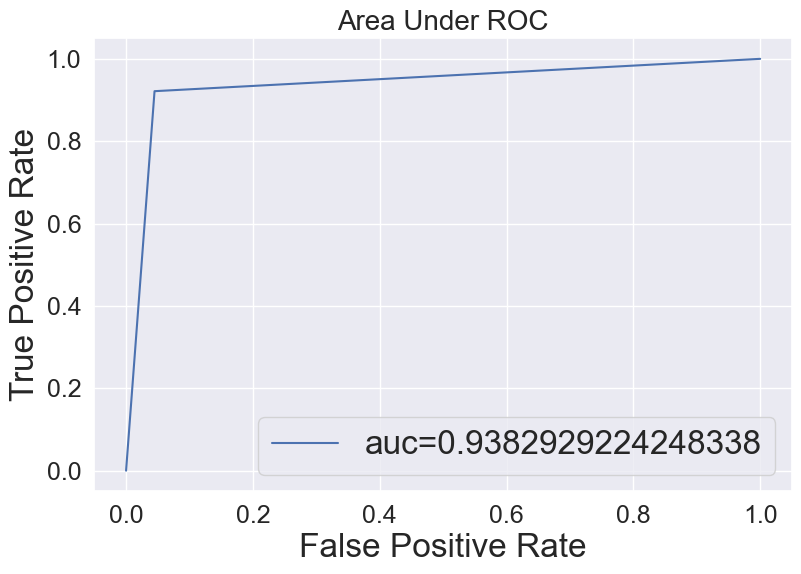

In [274]:


import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

#### Hyper-parameter Tuning

In [49]:
model_DT.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

##### RandomizedSearchCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_DT_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   34.5s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [53]:
y_pred_RSCV_DT = model_DT_random.predict(X_test)

In [54]:
RSCV_DT_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_DT).ravel()
RSCV_DT_confusion_matrix

array([14371,  1203,  2242, 13204], dtype=int64)

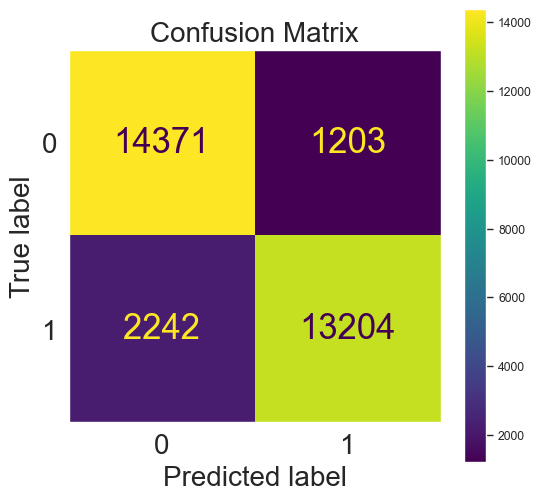

In [55]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_DT_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show() 

In [56]:

accuracy_score(y_test, y_pred_RSCV_DT)

0.8889426176660219

In [57]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_DT)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     15574
           1       0.92      0.85      0.88     15446

    accuracy                           0.89     31020
   macro avg       0.89      0.89      0.89     31020
weighted avg       0.89      0.89      0.89     31020



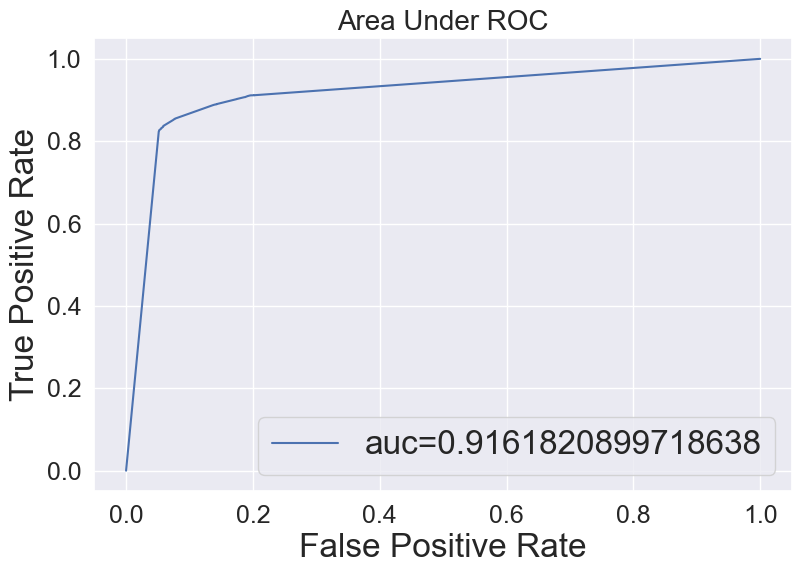

In [275]:
from sklearn import metrics
y_pred_proba = model_DT_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# import matplotlib.pyplot as plt 
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [59]:
gc.collect() 

14003

In [60]:
model_DT_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60}

### Random Forest

#### Modelling


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model_RF = RandomForestClassifier(max_depth=2)

In [63]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [64]:
y_pred_RF = model_RF.predict(X_test)

In [65]:
RF_confusion_matrix = confusion_matrix(y_test, y_pred_RF).ravel()
RF_confusion_matrix

array([13055,  2519,  2419, 13027], dtype=int64)

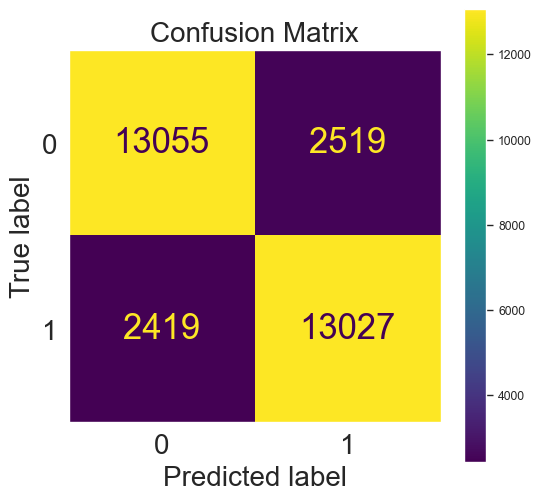

In [66]:


sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_RF, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#### Evaluation Metrics

In [67]:
metric_RF = {}
metric_RF['model_name'] = 'Random Forest'
metric_RF['TN'] = RF_confusion_matrix[0]
metric_RF['FP'] = RF_confusion_matrix[1]
metric_RF['FN'] = RF_confusion_matrix[2]
metric_RF['TP'] = RF_confusion_matrix[3]

metric_RF['model'] = model_RF

##### Accuracy

In [68]:

accuracy_score(y_test, y_pred_RF)

0.8408123791102514

##### Misclassification Rate

In [69]:

print("Classification Report: \n", classification_report(y_test, y_pred_RF)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     15574
           1       0.84      0.84      0.84     15446

    accuracy                           0.84     31020
   macro avg       0.84      0.84      0.84     31020
weighted avg       0.84      0.84      0.84     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

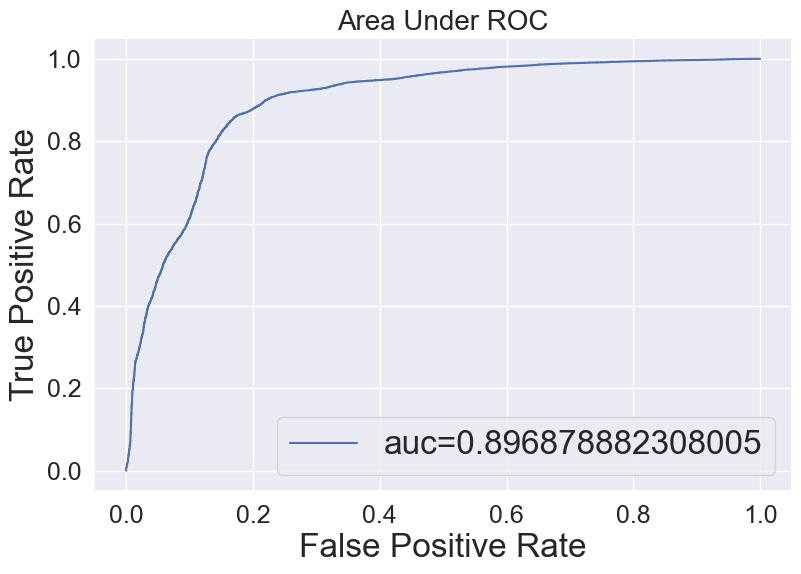

In [276]:
from sklearn import metrics
y_pred_proba = model_RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

#### Hyper-parameter Tuning

In [71]:
model_RF.get_params()  

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_RF_RSCV = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_RF_random = RandomizedSearchCV(estimator = model_RF_RSCV, param_distributions = random_grid1, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 63.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [74]:
y_pred_RSCV_RF = model_RF_random.predict(X_test)

In [75]:
RSCV_RF_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_RF).ravel()
RSCV_RF_confusion_matrix

array([15011,   563,  1078, 14368], dtype=int64)

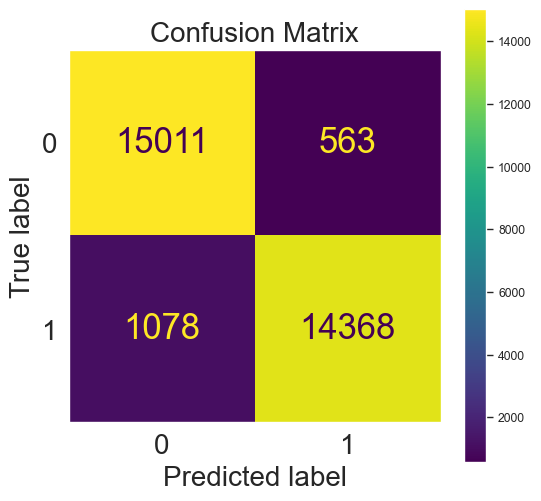

In [76]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_RF_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [77]:

accuracy_score(y_test, y_pred_RSCV_RF)

0.9470986460348162

In [78]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_RF)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     15574
           1       0.96      0.93      0.95     15446

    accuracy                           0.95     31020
   macro avg       0.95      0.95      0.95     31020
weighted avg       0.95      0.95      0.95     31020



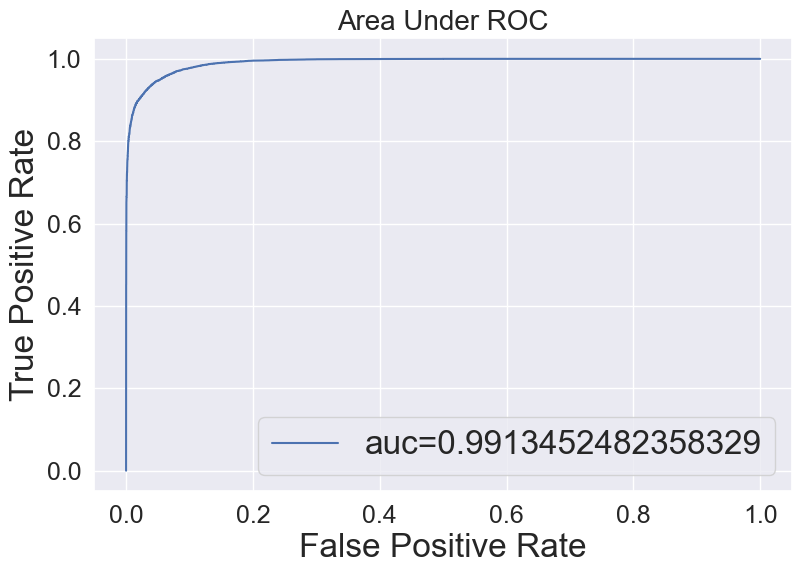

In [277]:
from sklearn import metrics
y_pred_proba = model_RF_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [80]:
gc.collect() 

13881

In [81]:
model_RF_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

### Support Vector Machine

#### Modelling


In [82]:
from sklearn import svm


In [83]:
model_SVC = svm.SVC()
model_SVC.fit(X_train, y_train)


SVC()

In [84]:
y_pred_SVC = model_SVC.predict(X_test)

In [85]:
SVC_confusion_matrix = confusion_matrix(y_test, y_pred_SVC).ravel()
SVC_confusion_matrix

array([14615,   959,  1673, 13773], dtype=int64)

In [86]:
#### Evaluation Metrics

In [87]:
metric_SVC = {}
metric_SVC['model_name'] = 'Support Vector Classifier'
metric_SVC['TN'] = SVC_confusion_matrix[0]
metric_SVC['FP'] = SVC_confusion_matrix[1]
metric_SVC['FN'] = SVC_confusion_matrix[2]
metric_SVC['TP'] = SVC_confusion_matrix[3]

metric_SVC['model'] = model_SVC

In [88]:
metric_SVC

{'model_name': 'Support Vector Classifier',
 'TN': 14615,
 'FP': 959,
 'FN': 1673,
 'TP': 13773,
 'model': SVC()}

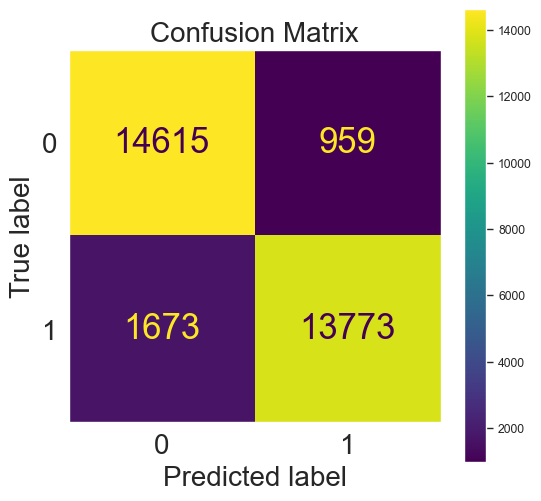

In [89]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_SVC, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [90]:
accuracy_score(y_test, y_pred_SVC)

0.9151515151515152

##### Accuracy

##### Misclassification Rate

In [91]:
print("Classification Report: \n", classification_report(y_test, y_pred_SVC))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     15574
           1       0.93      0.89      0.91     15446

    accuracy                           0.92     31020
   macro avg       0.92      0.92      0.92     31020
weighted avg       0.92      0.92      0.92     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

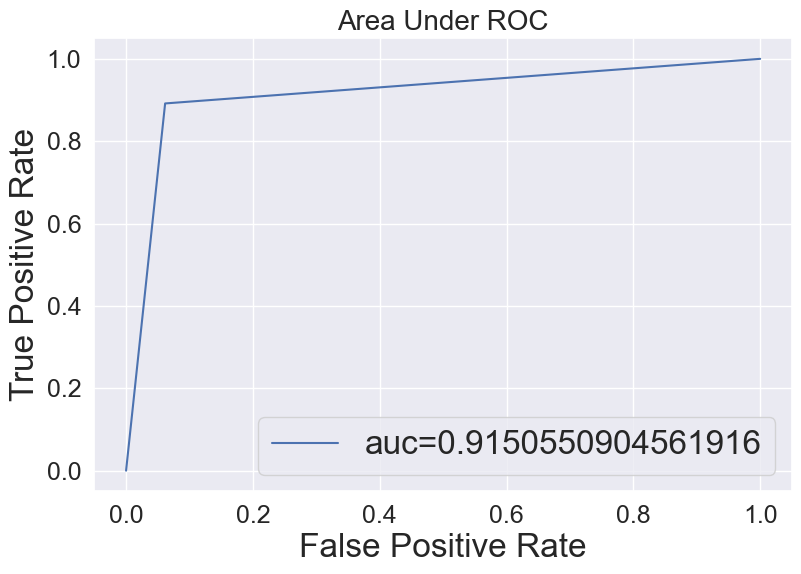

In [96]:
y_pred_proba = model_SVC.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)




import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [97]:
gc.collect() 

8432

#### Hyper-parameter Tuning

### XGBoost

#### Modelling


In [98]:
len(X_train.columns) 

296

In [99]:
duplicate_columns = data.columns[data.columns.duplicated()] 

In [100]:
duplicate_columns 

Index([], dtype='object')

In [101]:
import xgboost as xgb 
from numpy import loadtxt
from xgboost import plot_importance


# fit model no training data
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

[01:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
y_pred_xgb = model_xgb.predict(X_test)

In [103]:
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb).ravel()
xgb_confusion_matrix

array([15084,   490,   964, 14482], dtype=int64)

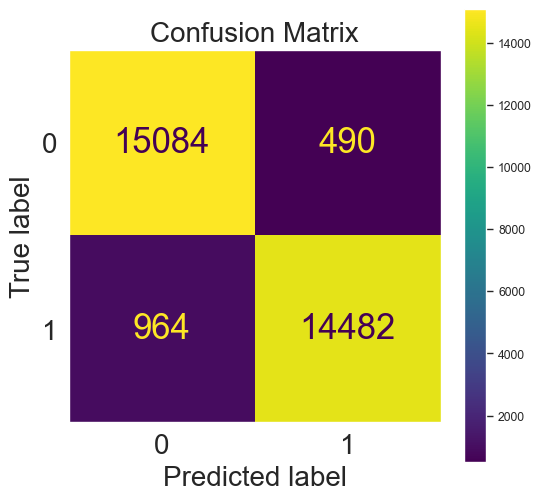

In [104]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_xgb, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#### Evaluation Metrics

In [105]:
metric_xgb = {}
metric_xgb['model_name'] = 'XGB Classifier'
metric_xgb['TN'] = xgb_confusion_matrix[0]
metric_xgb['FP'] = xgb_confusion_matrix[1]
metric_xgb['FN'] = xgb_confusion_matrix[2]
metric_xgb['TP'] = xgb_confusion_matrix[3]

metric_xgb['model'] = model_xgb

In [106]:
metric_xgb

{'model_name': 'XGB Classifier',
 'TN': 15084,
 'FP': 490,
 'FN': 964,
 'TP': 14482,
 'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

In [ ]:
# results = model_xgb.evals_result()

##### Accuracy

In [107]:
accuracy_score(y_test, y_pred_xgb)

0.9531270148291425

##### Misclassification Rate

In [108]:
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     15574
           1       0.97      0.94      0.95     15446

    accuracy                           0.95     31020
   macro avg       0.95      0.95      0.95     31020
weighted avg       0.95      0.95      0.95     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

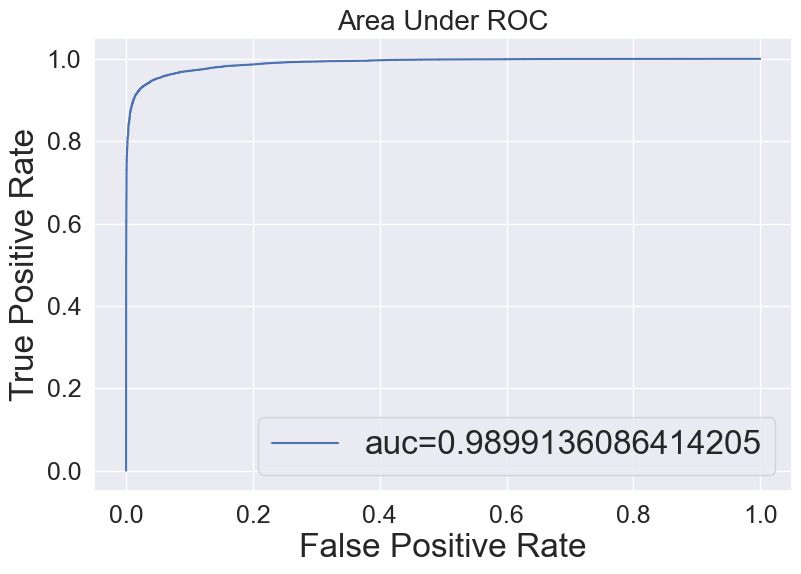

In [109]:

y_pred_proba = model_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

##### plot_importance() Graph

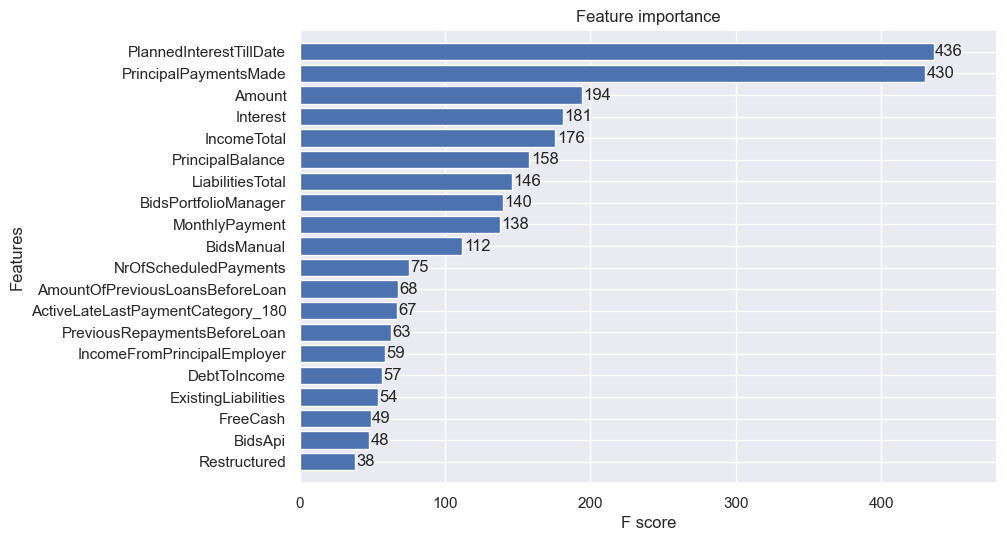

In [110]:
from matplotlib import pyplot
plot_importance(model_xgb, max_num_features=20, height=0.8)
pyplot.show()

#### Hyper-parameter Tuning

In [111]:
model_xgb.get_xgb_params() 

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [112]:
model_xgb.get_params()  

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [113]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

In [114]:


model_xgb_RSCV = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
model_XGB_random = RandomizedSearchCV(model_xgb_RSCV, param_distributions = param_dist, n_iter = 50, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)


In [115]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_XGB_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 53.6min finished


[02:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estima...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001791D13C7C0>,
                                        'lear

In [116]:
y_pred_RSCV_Xgb = model_XGB_random.predict(X_test)

In [117]:
RSCV_Xgb_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_Xgb).ravel()
RSCV_Xgb_confusion_matrix

array([15205,   369,   871, 14575], dtype=int64)

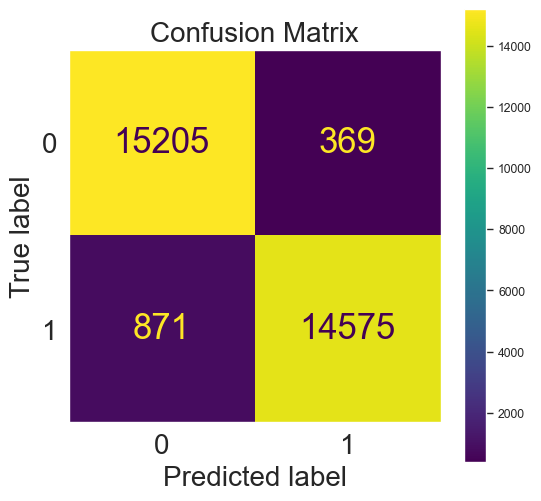

In [118]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_XGB_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [119]:

accuracy_score(y_test, y_pred_RSCV_Xgb)

0.9600257898130239

In [120]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_Xgb)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     15574
           1       0.98      0.94      0.96     15446

    accuracy                           0.96     31020
   macro avg       0.96      0.96      0.96     31020
weighted avg       0.96      0.96      0.96     31020



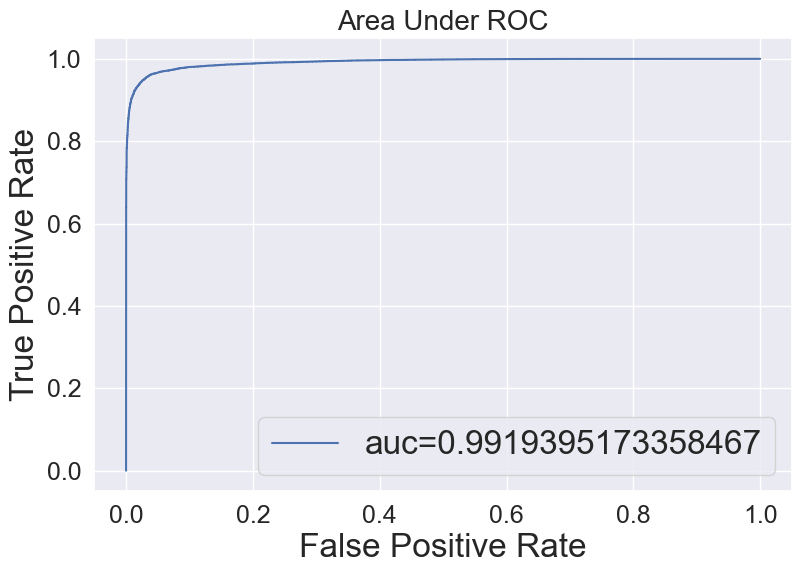

In [121]:
from sklearn import metrics
y_pred_proba = model_XGB_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [122]:
model_XGB_random.best_params_ 

{'colsample_bytree': 0.8916688336995001,
 'learning_rate': 0.15421546885407916,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 387,
 'subsample': 0.7577979368881429}

In [284]:
best_xgb = XGBClassifier(colsample_bytree = 0.8916688336995001,learning_rate= 0.15421546885407916,max_depth= 7,min_child_weight= 4,n_estimators= 387,subsample= 0.7577979368881429)

In [285]:
best_xgb.fit(X_train, y_train) 

[13:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8916688336995001, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15421546885407916, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=387, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7577979368881429, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [286]:
y_pred_Xgb_best = best_xgb.predict(X_test)

In [287]:
best_Xgb_confusion_matrix = confusion_matrix(y_test, y_pred_Xgb_best).ravel()
best_Xgb_confusion_matrix

array([15205,   369,   871, 14575], dtype=int64)

In [280]:
model_xgb 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
model_XGB_random

RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estima...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001791D13C7C0>,
                                        'lear

### LightGBM

#### Modelling


In [123]:
import lightgbm as lgbm

In [124]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

LGBMClassifier()

In [125]:
y_pred_lgbm = model_lgbm.predict(X_test)

In [126]:
lgbm_confusion_matrix = confusion_matrix(y_test, y_pred_lgbm).ravel()
lgbm_confusion_matrix

array([14990,   584,  1142, 14304], dtype=int64)

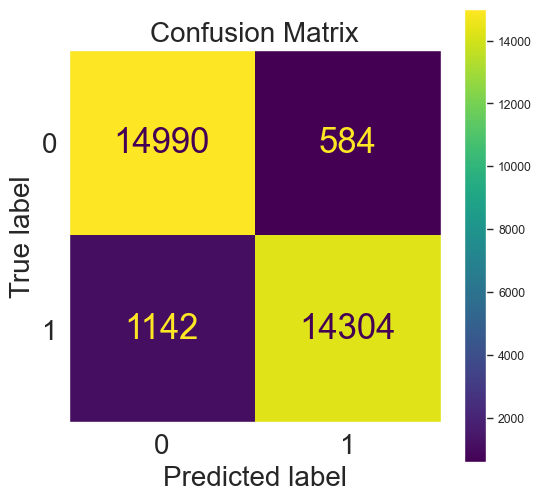

In [127]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_lgbm, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#### Evaluation Metrics

In [128]:
metric_lgbm = {}
metric_lgbm['model_name'] = 'LGBM Classifier'
metric_lgbm['TN'] = lgbm_confusion_matrix[0]
metric_lgbm['FP'] = lgbm_confusion_matrix[1]
metric_lgbm['FN'] = lgbm_confusion_matrix[2]
metric_lgbm['TP'] = lgbm_confusion_matrix[3]

metric_lgbm['model'] = model_lgbm

In [129]:
metric_lgbm

{'model_name': 'LGBM Classifier',
 'TN': 14990,
 'FP': 584,
 'FN': 1142,
 'TP': 14304,
 'model': LGBMClassifier()}

##### Accuracy

In [130]:
accuracy_score(y_test, y_pred_lgbm)

0.9443584784010316

##### Misclassification Rate

In [131]:
print("Classification Report: \n", classification_report(y_test, y_pred_lgbm))  

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     15574
           1       0.96      0.93      0.94     15446

    accuracy                           0.94     31020
   macro avg       0.94      0.94      0.94     31020
weighted avg       0.94      0.94      0.94     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

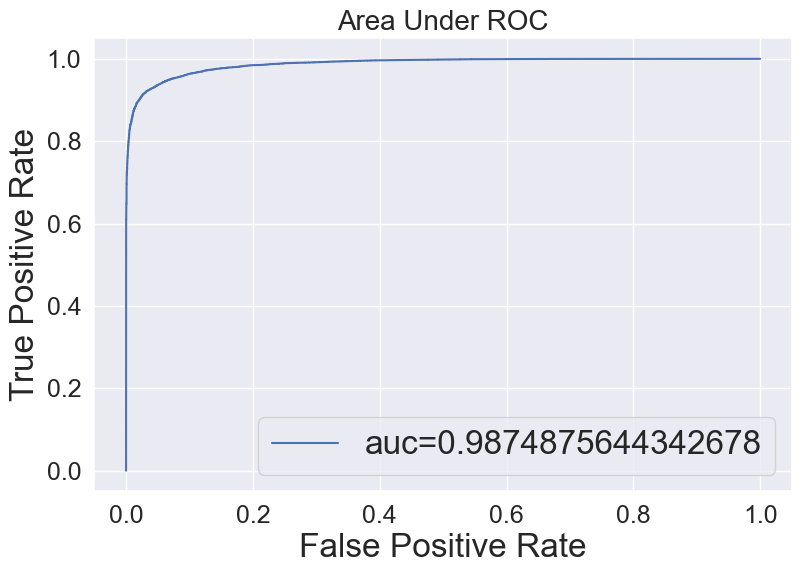

In [132]:
y_pred_proba = model_lgbm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

#### Hyper-parameter Tuning

In [ ]:
# params = {} #initialize parameters
# params['learning_rate'] = np.random.uniform(0, 1)
# params['boosting_type'] = np.random.choice(['gbdt', 'dart', 'goss'])
# params['objective'] = 'regression'
# params['metric'] = 'mae'
# params['sub_feature'] = np.random.uniform(0, 1)
# params['num_leaves'] = np.random.randint(20, 300)
# params['min_data'] = np.random.randint(10, 100)
# params['max_depth'] = np.random.randint(5, 200)
# iterations = np.random.randint(10, 10000)
# print(params, iterations)

In [ ]:

# # Number of trees in random forest
# #n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# #bootstrap = [True, False]
# # Create the random grid
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [133]:
model_lgbm.get_params()  

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [134]:

param_dist2 = {'n_estimators': stats.randint(25, 50, 100),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
#model_XGB_random = RandomizedSearchCV(model_xgb_RSCV, param_distributions = param_dist2, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)


In [135]:
gc.collect() 

26873

In [136]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_lgbm_RSCV = lgb.LGBMClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_lgbm_random = RandomizedSearchCV(model_xgb_RSCV, param_distributions = param_dist2, n_iter = 50, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = 15)
# Fit the random search model
model_lgbm_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=15)]: Done  98 tasks      | elapsed:  5.3min
[Parallel(n_jobs=15)]: Done 250 out of 250 | elapsed: 15.7min finished


[03:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estima...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000179379988E0>,
                                        'lear

In [137]:
y_pred_RSCV_lgbm = model_lgbm_random.predict(X_test)

In [138]:
RSCV_lgbm_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_lgbm).ravel()
RSCV_lgbm_confusion_matrix

array([15183,   391,   901, 14545], dtype=int64)

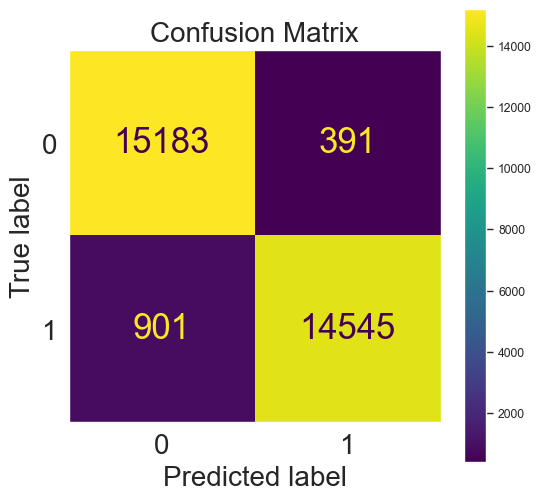

In [139]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_lgbm_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [140]:

accuracy_score(y_test, y_pred_RSCV_lgbm)

0.9583494519664733

In [141]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_lgbm)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     15574
           1       0.97      0.94      0.96     15446

    accuracy                           0.96     31020
   macro avg       0.96      0.96      0.96     31020
weighted avg       0.96      0.96      0.96     31020



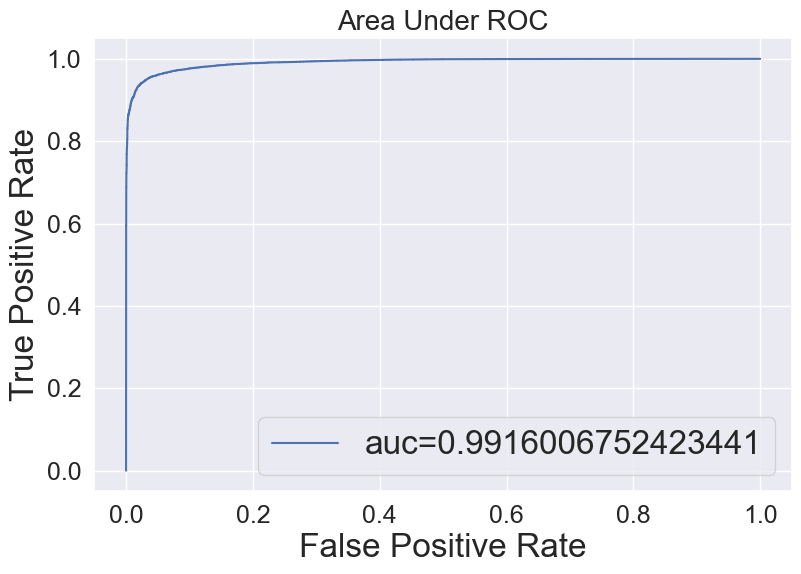

In [142]:
from sklearn import metrics
y_pred_proba = model_lgbm_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [143]:
model_lgbm_random.best_params_ 

{'colsample_bytree': 0.7104726702398283,
 'learning_rate': 0.22522684239705396,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 136,
 'subsample': 0.9732093424858663}

In [145]:
gc.collect()   

20

### CatBoost

#### Modelling


In [146]:
import catboost as cb

In [147]:
model_cb = cb.CatBoostClassifier()
model_cb.fit(X_train, y_train)

Learning rate set to 0.06412
0:	learn: 0.6018747	total: 174ms	remaining: 2m 54s
1:	learn: 0.5304488	total: 187ms	remaining: 1m 33s
2:	learn: 0.4746804	total: 200ms	remaining: 1m 6s
3:	learn: 0.4362207	total: 214ms	remaining: 53.2s
4:	learn: 0.4053957	total: 226ms	remaining: 45.1s
5:	learn: 0.3818934	total: 239ms	remaining: 39.6s
6:	learn: 0.3603345	total: 252ms	remaining: 35.8s
7:	learn: 0.3455681	total: 264ms	remaining: 32.8s
8:	learn: 0.3334028	total: 276ms	remaining: 30.4s
9:	learn: 0.3226834	total: 288ms	remaining: 28.5s
10:	learn: 0.3140595	total: 300ms	remaining: 27s
11:	learn: 0.3055651	total: 312ms	remaining: 25.7s
12:	learn: 0.2992948	total: 324ms	remaining: 24.6s
13:	learn: 0.2929782	total: 344ms	remaining: 24.2s
14:	learn: 0.2872929	total: 362ms	remaining: 23.8s
15:	learn: 0.2825318	total: 378ms	remaining: 23.3s
16:	learn: 0.2772641	total: 391ms	remaining: 22.6s
17:	learn: 0.2737325	total: 402ms	remaining: 21.9s
18:	learn: 0.2699083	total: 414ms	remaining: 21.4s
19:	learn: 0

171:	learn: 0.1708763	total: 2.2s	remaining: 10.6s
172:	learn: 0.1706416	total: 2.21s	remaining: 10.6s
173:	learn: 0.1705171	total: 2.23s	remaining: 10.6s
174:	learn: 0.1702475	total: 2.24s	remaining: 10.5s
175:	learn: 0.1701062	total: 2.25s	remaining: 10.5s
176:	learn: 0.1696776	total: 2.26s	remaining: 10.5s
177:	learn: 0.1694769	total: 2.27s	remaining: 10.5s
178:	learn: 0.1685935	total: 2.28s	remaining: 10.5s
179:	learn: 0.1680246	total: 2.29s	remaining: 10.5s
180:	learn: 0.1678790	total: 2.31s	remaining: 10.4s
181:	learn: 0.1673167	total: 2.32s	remaining: 10.4s
182:	learn: 0.1667223	total: 2.33s	remaining: 10.4s
183:	learn: 0.1664916	total: 2.34s	remaining: 10.4s
184:	learn: 0.1659669	total: 2.35s	remaining: 10.4s
185:	learn: 0.1654250	total: 2.36s	remaining: 10.3s
186:	learn: 0.1652986	total: 2.37s	remaining: 10.3s
187:	learn: 0.1648928	total: 2.39s	remaining: 10.3s
188:	learn: 0.1648300	total: 2.4s	remaining: 10.3s
189:	learn: 0.1646327	total: 2.41s	remaining: 10.3s
190:	learn: 0.

334:	learn: 0.1400592	total: 4.03s	remaining: 8s
335:	learn: 0.1399851	total: 4.04s	remaining: 7.99s
336:	learn: 0.1398796	total: 4.05s	remaining: 7.98s
337:	learn: 0.1398111	total: 4.07s	remaining: 7.96s
338:	learn: 0.1397234	total: 4.08s	remaining: 7.95s
339:	learn: 0.1395232	total: 4.09s	remaining: 7.94s
340:	learn: 0.1394116	total: 4.1s	remaining: 7.92s
341:	learn: 0.1393349	total: 4.11s	remaining: 7.91s
342:	learn: 0.1392651	total: 4.12s	remaining: 7.9s
343:	learn: 0.1392092	total: 4.13s	remaining: 7.88s
344:	learn: 0.1390456	total: 4.15s	remaining: 7.87s
345:	learn: 0.1389965	total: 4.16s	remaining: 7.86s
346:	learn: 0.1388808	total: 4.17s	remaining: 7.85s
347:	learn: 0.1388398	total: 4.18s	remaining: 7.83s
348:	learn: 0.1387737	total: 4.19s	remaining: 7.82s
349:	learn: 0.1387228	total: 4.2s	remaining: 7.8s
350:	learn: 0.1386656	total: 4.21s	remaining: 7.79s
351:	learn: 0.1385972	total: 4.22s	remaining: 7.78s
352:	learn: 0.1384551	total: 4.24s	remaining: 7.77s
353:	learn: 0.13826

496:	learn: 0.1253461	total: 5.86s	remaining: 5.93s
497:	learn: 0.1252498	total: 5.87s	remaining: 5.92s
498:	learn: 0.1252021	total: 5.88s	remaining: 5.91s
499:	learn: 0.1250916	total: 5.89s	remaining: 5.89s
500:	learn: 0.1250639	total: 5.91s	remaining: 5.88s
501:	learn: 0.1249943	total: 5.92s	remaining: 5.87s
502:	learn: 0.1249300	total: 5.93s	remaining: 5.86s
503:	learn: 0.1248745	total: 5.94s	remaining: 5.85s
504:	learn: 0.1247781	total: 5.95s	remaining: 5.83s
505:	learn: 0.1247144	total: 5.96s	remaining: 5.82s
506:	learn: 0.1245474	total: 5.98s	remaining: 5.81s
507:	learn: 0.1244968	total: 5.99s	remaining: 5.8s
508:	learn: 0.1243347	total: 6s	remaining: 5.79s
509:	learn: 0.1242613	total: 6.01s	remaining: 5.78s
510:	learn: 0.1241697	total: 6.02s	remaining: 5.76s
511:	learn: 0.1239774	total: 6.04s	remaining: 5.75s
512:	learn: 0.1239378	total: 6.05s	remaining: 5.74s
513:	learn: 0.1238813	total: 6.06s	remaining: 5.73s
514:	learn: 0.1238177	total: 6.07s	remaining: 5.72s
515:	learn: 0.12

657:	learn: 0.1138455	total: 7.68s	remaining: 3.99s
658:	learn: 0.1137968	total: 7.69s	remaining: 3.98s
659:	learn: 0.1137543	total: 7.7s	remaining: 3.97s
660:	learn: 0.1136854	total: 7.71s	remaining: 3.96s
661:	learn: 0.1136486	total: 7.73s	remaining: 3.94s
662:	learn: 0.1136195	total: 7.74s	remaining: 3.93s
663:	learn: 0.1135379	total: 7.75s	remaining: 3.92s
664:	learn: 0.1134902	total: 7.76s	remaining: 3.91s
665:	learn: 0.1134243	total: 7.77s	remaining: 3.9s
666:	learn: 0.1133450	total: 7.78s	remaining: 3.88s
667:	learn: 0.1132906	total: 7.79s	remaining: 3.87s
668:	learn: 0.1132175	total: 7.8s	remaining: 3.86s
669:	learn: 0.1131701	total: 7.81s	remaining: 3.85s
670:	learn: 0.1130875	total: 7.83s	remaining: 3.84s
671:	learn: 0.1129880	total: 7.84s	remaining: 3.82s
672:	learn: 0.1129467	total: 7.85s	remaining: 3.81s
673:	learn: 0.1128759	total: 7.86s	remaining: 3.8s
674:	learn: 0.1127809	total: 7.87s	remaining: 3.79s
675:	learn: 0.1126664	total: 7.88s	remaining: 3.78s
676:	learn: 0.11

823:	learn: 0.1036700	total: 9.51s	remaining: 2.03s
824:	learn: 0.1035571	total: 9.52s	remaining: 2.02s
825:	learn: 0.1034848	total: 9.53s	remaining: 2.01s
826:	learn: 0.1034246	total: 9.54s	remaining: 2s
827:	learn: 0.1033260	total: 9.56s	remaining: 1.99s
828:	learn: 0.1032961	total: 9.57s	remaining: 1.97s
829:	learn: 0.1032854	total: 9.58s	remaining: 1.96s
830:	learn: 0.1032283	total: 9.59s	remaining: 1.95s
831:	learn: 0.1032059	total: 9.6s	remaining: 1.94s
832:	learn: 0.1031711	total: 9.61s	remaining: 1.93s
833:	learn: 0.1030647	total: 9.62s	remaining: 1.92s
834:	learn: 0.1030242	total: 9.63s	remaining: 1.9s
835:	learn: 0.1029423	total: 9.65s	remaining: 1.89s
836:	learn: 0.1028813	total: 9.66s	remaining: 1.88s
837:	learn: 0.1028219	total: 9.67s	remaining: 1.87s
838:	learn: 0.1027532	total: 9.68s	remaining: 1.86s
839:	learn: 0.1026935	total: 9.69s	remaining: 1.85s
840:	learn: 0.1026613	total: 9.7s	remaining: 1.83s
841:	learn: 0.1025867	total: 9.71s	remaining: 1.82s
842:	learn: 0.1025

989:	learn: 0.0954272	total: 11.3s	remaining: 114ms
990:	learn: 0.0953988	total: 11.3s	remaining: 103ms
991:	learn: 0.0953202	total: 11.3s	remaining: 91.5ms
992:	learn: 0.0952892	total: 11.4s	remaining: 80.1ms
993:	learn: 0.0952513	total: 11.4s	remaining: 68.6ms
994:	learn: 0.0952181	total: 11.4s	remaining: 57.2ms
995:	learn: 0.0951942	total: 11.4s	remaining: 45.7ms
996:	learn: 0.0951462	total: 11.4s	remaining: 34.3ms
997:	learn: 0.0951289	total: 11.4s	remaining: 22.9ms
998:	learn: 0.0951280	total: 11.4s	remaining: 11.4ms
999:	learn: 0.0950868	total: 11.4s	remaining: 0us


In [148]:
y_pred_cb = model_cb.predict(X_test)

In [149]:
cb_confusion_matrix = confusion_matrix(y_test, y_pred_cb).ravel()
cb_confusion_matrix

array([15101,   473,   977, 14469], dtype=int64)

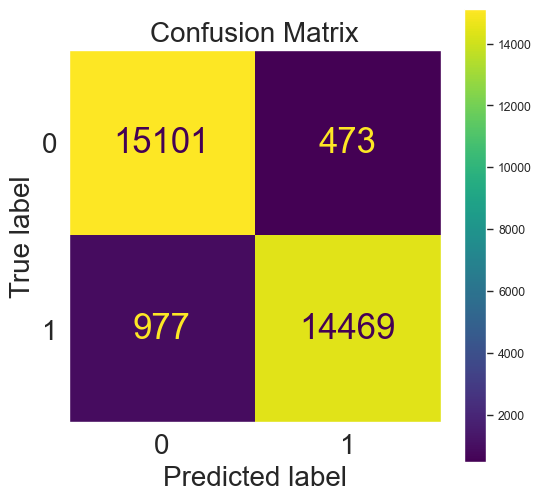

In [150]:


sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_cb, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#### Evaluation Metrics

In [151]:
metric_cb = {}
metric_cb['model_name'] = 'CatBoost Classifier'
metric_cb['TN'] = cb_confusion_matrix[0]
metric_cb['FP'] = cb_confusion_matrix[1]
metric_cb['FN'] = cb_confusion_matrix[2]
metric_cb['TP'] = cb_confusion_matrix[3]

metric_cb['model'] = model_cb

In [152]:
metric_cb

{'model_name': 'CatBoost Classifier',
 'TN': 15101,
 'FP': 473,
 'FN': 977,
 'TP': 14469,
 'model': <catboost.core.CatBoostClassifier at 0x17937998fa0>}

##### Accuracy

In [153]:
accuracy_score(y_test, y_pred_cb)

0.9532559638942618

##### Misclassification Rate

In [154]:
print("Classification Report: \n", classification_report(y_test, y_pred_cb)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     15574
           1       0.97      0.94      0.95     15446

    accuracy                           0.95     31020
   macro avg       0.95      0.95      0.95     31020
weighted avg       0.95      0.95      0.95     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

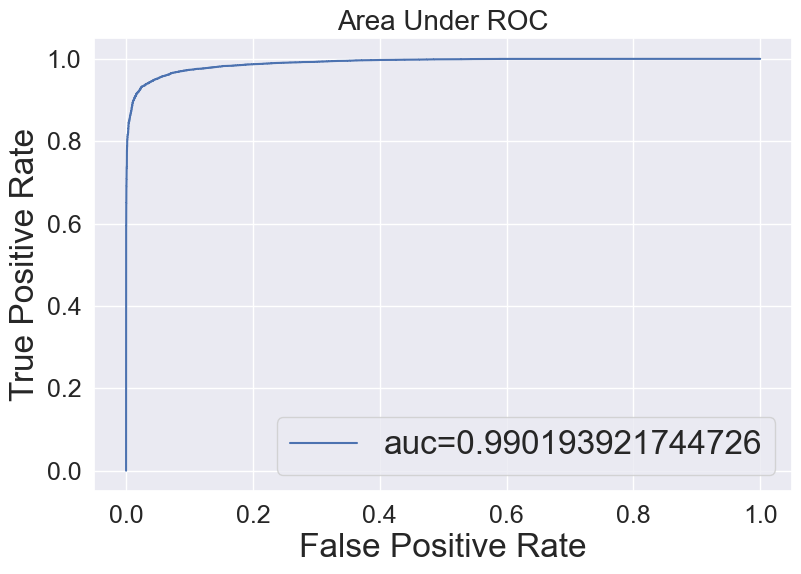

In [155]:
y_pred_proba = model_cb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

#### Hyper-parameter Tuning

In [156]:
model_cb.get_all_params()   

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.06412000209093094,
 'score_function': 'Cosine',
 'task_type': 'CPU',


In [ ]:

# # Number of trees in random forest
# #n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# #bootstrap = [True, False]
# # Create the random grid
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# #'n_estimators': n_estimators,
# #'bootstrap': bootstrap
# # pprint(random_grid)
# # {'bootstrap': [True, False],
# #  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# #  'max_features': ['auto', 'sqrt'],
# #  'min_samples_leaf': [1, 2, 4],
# #  'min_samples_split': [2, 5, 10],
# #  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [157]:
gc.collect() 

7032

In [158]:
parameters_cb = {'depth'         : [3, 4, 5, 6, 7, 8, 9],
              'learning_rate' : stats.uniform(0.01, 0.6),
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
              'l2_leaf_reg': [1, 3, 5, 7, 9]}

# 'n_estimators': stats.randint(150, 1000),
#               'learning_rate': stats.uniform(0.01, 0.6),
#               'subsample': stats.uniform(0.3, 0.9),
#               'max_depth': [3, 4, 5, 6, 7, 8, 9],
#               'colsample_bytree': stats.uniform(0.5, 0.9),
#               'min_child_weight': [1, 2, 3, 4]

In [159]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#model_DT_RSCV = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#model_DT_random = RandomizedSearchCV(estimator = model_DT_RSCV, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#model_DT_random.fit(X_train, y_train)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_CatB_RSCV = cb.CatBoostClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_CatB_random = RandomizedSearchCV(model_CatB_RSCV, param_distributions = parameters_cb, n_iter = 50, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = 15)
# Fit the random search model
model_CatB_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=15)]: Done  98 tasks      | elapsed:  2.0min
[Parallel(n_jobs=15)]: Done 250 out of 250 | elapsed:  4.3min finished


0:	learn: 0.6296991	total: 56.6ms	remaining: 5.03s
1:	learn: 0.5756409	total: 113ms	remaining: 4.97s
2:	learn: 0.5287020	total: 168ms	remaining: 4.87s
3:	learn: 0.4899485	total: 227ms	remaining: 4.88s
4:	learn: 0.4559680	total: 286ms	remaining: 4.86s
5:	learn: 0.4269642	total: 343ms	remaining: 4.8s
6:	learn: 0.4041192	total: 403ms	remaining: 4.78s
7:	learn: 0.3843943	total: 462ms	remaining: 4.74s
8:	learn: 0.3662296	total: 521ms	remaining: 4.69s
9:	learn: 0.3524846	total: 577ms	remaining: 4.62s
10:	learn: 0.3386661	total: 638ms	remaining: 4.58s
11:	learn: 0.3263552	total: 693ms	remaining: 4.5s
12:	learn: 0.3173713	total: 753ms	remaining: 4.46s
13:	learn: 0.3091976	total: 814ms	remaining: 4.42s
14:	learn: 0.3016073	total: 872ms	remaining: 4.36s
15:	learn: 0.2940938	total: 940ms	remaining: 4.34s
16:	learn: 0.2880178	total: 1.01s	remaining: 4.34s
17:	learn: 0.2820100	total: 1.09s	remaining: 4.35s
18:	learn: 0.2772249	total: 1.15s	remaining: 4.3s
19:	learn: 0.2721840	total: 1.21s	remaining

RandomizedSearchCV(error_score=0,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000017966459B50>,
                   n_iter=50, n_jobs=15,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   scoring='roc_auc', verbose=3)

In [160]:
y_pred_RSCV_CatB = model_CatB_random.predict(X_test)

In [161]:
RSCV_CatB_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_CatB).ravel()
RSCV_CatB_confusion_matrix

array([14826,   748,  1554, 13892], dtype=int64)

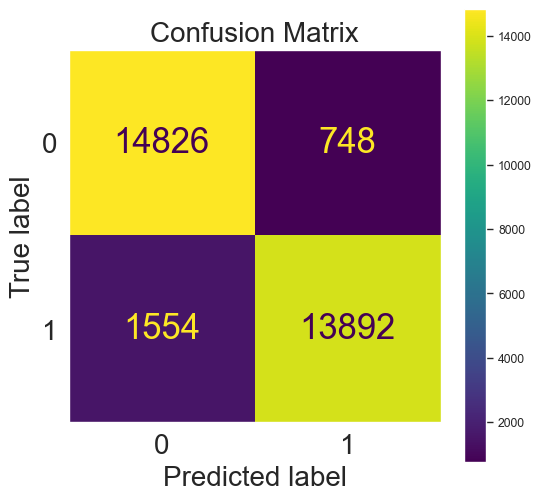

In [162]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_CatB_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [163]:

accuracy_score(y_test, y_pred_RSCV_CatB)

0.9257898130238555

In [164]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_CatB)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     15574
           1       0.95      0.90      0.92     15446

    accuracy                           0.93     31020
   macro avg       0.93      0.93      0.93     31020
weighted avg       0.93      0.93      0.93     31020



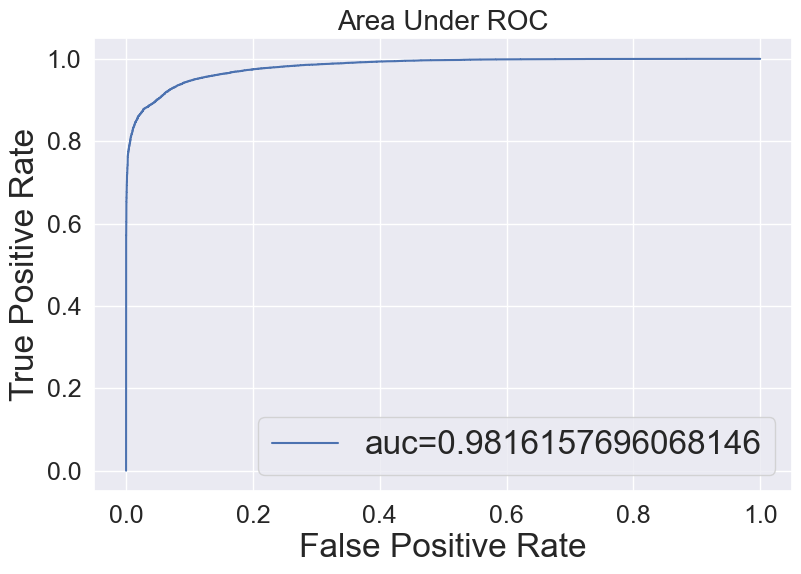

In [165]:
from sklearn import metrics
y_pred_proba = model_CatB_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [166]:
model_CatB_random.best_params_

{'learning_rate': 0.04, 'l2_leaf_reg': 1, 'iterations': 90, 'depth': 10}

### StackedEnsemble

#### Modelling


In [167]:
from sklearn.ensemble import StackingClassifier
estimators = [
('cb', cb.CatBoostClassifier()),
('lgbm', lgbm.LGBMClassifier())]

stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacked_clf.fit(X_train, y_train)

Learning rate set to 0.06412
0:	learn: 0.6018747	total: 13.2ms	remaining: 13.2s
1:	learn: 0.5304488	total: 25.1ms	remaining: 12.5s
2:	learn: 0.4746804	total: 36.9ms	remaining: 12.3s
3:	learn: 0.4362207	total: 48.5ms	remaining: 12.1s
4:	learn: 0.4053957	total: 59.3ms	remaining: 11.8s
5:	learn: 0.3818934	total: 70ms	remaining: 11.6s
6:	learn: 0.3603345	total: 81.4ms	remaining: 11.5s
7:	learn: 0.3455681	total: 91.6ms	remaining: 11.4s
8:	learn: 0.3334028	total: 102ms	remaining: 11.3s
9:	learn: 0.3226834	total: 113ms	remaining: 11.2s
10:	learn: 0.3140595	total: 124ms	remaining: 11.1s
11:	learn: 0.3055651	total: 135ms	remaining: 11.1s
12:	learn: 0.2992948	total: 146ms	remaining: 11s
13:	learn: 0.2929782	total: 156ms	remaining: 11s
14:	learn: 0.2872929	total: 167ms	remaining: 10.9s
15:	learn: 0.2825318	total: 177ms	remaining: 10.9s
16:	learn: 0.2772641	total: 190ms	remaining: 11s
17:	learn: 0.2737325	total: 202ms	remaining: 11s
18:	learn: 0.2699083	total: 214ms	remaining: 11s
19:	learn: 0.267

167:	learn: 0.1717877	total: 2.02s	remaining: 10s
168:	learn: 0.1716095	total: 2.03s	remaining: 9.99s
169:	learn: 0.1715267	total: 2.04s	remaining: 9.97s
170:	learn: 0.1714074	total: 2.05s	remaining: 9.95s
171:	learn: 0.1708763	total: 2.06s	remaining: 9.93s
172:	learn: 0.1706416	total: 2.07s	remaining: 9.91s
173:	learn: 0.1705171	total: 2.08s	remaining: 9.89s
174:	learn: 0.1702475	total: 2.1s	remaining: 9.88s
175:	learn: 0.1701062	total: 2.11s	remaining: 9.87s
176:	learn: 0.1696776	total: 2.12s	remaining: 9.85s
177:	learn: 0.1694769	total: 2.13s	remaining: 9.84s
178:	learn: 0.1685935	total: 2.14s	remaining: 9.82s
179:	learn: 0.1680246	total: 2.15s	remaining: 9.81s
180:	learn: 0.1678790	total: 2.17s	remaining: 9.8s
181:	learn: 0.1673167	total: 2.18s	remaining: 9.79s
182:	learn: 0.1667223	total: 2.19s	remaining: 9.78s
183:	learn: 0.1664916	total: 2.2s	remaining: 9.76s
184:	learn: 0.1659669	total: 2.21s	remaining: 9.76s
185:	learn: 0.1654250	total: 2.23s	remaining: 9.74s
186:	learn: 0.165

333:	learn: 0.1402195	total: 3.84s	remaining: 7.66s
334:	learn: 0.1400592	total: 3.85s	remaining: 7.65s
335:	learn: 0.1399851	total: 3.87s	remaining: 7.64s
336:	learn: 0.1398796	total: 3.88s	remaining: 7.63s
337:	learn: 0.1398111	total: 3.89s	remaining: 7.61s
338:	learn: 0.1397234	total: 3.9s	remaining: 7.6s
339:	learn: 0.1395232	total: 3.91s	remaining: 7.59s
340:	learn: 0.1394116	total: 3.92s	remaining: 7.58s
341:	learn: 0.1393349	total: 3.93s	remaining: 7.56s
342:	learn: 0.1392651	total: 3.94s	remaining: 7.55s
343:	learn: 0.1392092	total: 3.95s	remaining: 7.53s
344:	learn: 0.1390456	total: 3.96s	remaining: 7.52s
345:	learn: 0.1389965	total: 3.97s	remaining: 7.51s
346:	learn: 0.1388808	total: 3.98s	remaining: 7.5s
347:	learn: 0.1388398	total: 3.99s	remaining: 7.48s
348:	learn: 0.1387737	total: 4s	remaining: 7.47s
349:	learn: 0.1387228	total: 4.01s	remaining: 7.45s
350:	learn: 0.1386656	total: 4.03s	remaining: 7.44s
351:	learn: 0.1385972	total: 4.04s	remaining: 7.43s
352:	learn: 0.1384

496:	learn: 0.1253461	total: 5.67s	remaining: 5.74s
497:	learn: 0.1252498	total: 5.68s	remaining: 5.73s
498:	learn: 0.1252021	total: 5.7s	remaining: 5.72s
499:	learn: 0.1250916	total: 5.71s	remaining: 5.71s
500:	learn: 0.1250639	total: 5.72s	remaining: 5.69s
501:	learn: 0.1249943	total: 5.73s	remaining: 5.68s
502:	learn: 0.1249300	total: 5.74s	remaining: 5.67s
503:	learn: 0.1248745	total: 5.75s	remaining: 5.66s
504:	learn: 0.1247781	total: 5.76s	remaining: 5.65s
505:	learn: 0.1247144	total: 5.77s	remaining: 5.63s
506:	learn: 0.1245474	total: 5.78s	remaining: 5.62s
507:	learn: 0.1244968	total: 5.79s	remaining: 5.61s
508:	learn: 0.1243347	total: 5.8s	remaining: 5.6s
509:	learn: 0.1242613	total: 5.82s	remaining: 5.59s
510:	learn: 0.1241697	total: 5.83s	remaining: 5.58s
511:	learn: 0.1239774	total: 5.84s	remaining: 5.57s
512:	learn: 0.1239378	total: 5.85s	remaining: 5.55s
513:	learn: 0.1238813	total: 5.86s	remaining: 5.54s
514:	learn: 0.1238177	total: 5.87s	remaining: 5.53s
515:	learn: 0.1

658:	learn: 0.1137968	total: 7.5s	remaining: 3.88s
659:	learn: 0.1137543	total: 7.51s	remaining: 3.87s
660:	learn: 0.1136854	total: 7.52s	remaining: 3.86s
661:	learn: 0.1136486	total: 7.53s	remaining: 3.84s
662:	learn: 0.1136195	total: 7.54s	remaining: 3.83s
663:	learn: 0.1135379	total: 7.55s	remaining: 3.82s
664:	learn: 0.1134902	total: 7.56s	remaining: 3.81s
665:	learn: 0.1134243	total: 7.57s	remaining: 3.8s
666:	learn: 0.1133450	total: 7.58s	remaining: 3.79s
667:	learn: 0.1132906	total: 7.59s	remaining: 3.77s
668:	learn: 0.1132175	total: 7.61s	remaining: 3.76s
669:	learn: 0.1131701	total: 7.62s	remaining: 3.75s
670:	learn: 0.1130875	total: 7.63s	remaining: 3.74s
671:	learn: 0.1129880	total: 7.64s	remaining: 3.73s
672:	learn: 0.1129467	total: 7.65s	remaining: 3.72s
673:	learn: 0.1128759	total: 7.67s	remaining: 3.71s
674:	learn: 0.1127809	total: 7.68s	remaining: 3.7s
675:	learn: 0.1126664	total: 7.69s	remaining: 3.69s
676:	learn: 0.1126255	total: 7.7s	remaining: 3.67s
677:	learn: 0.11

819:	learn: 0.1040232	total: 9.32s	remaining: 2.05s
820:	learn: 0.1039039	total: 9.33s	remaining: 2.04s
821:	learn: 0.1038557	total: 9.35s	remaining: 2.02s
822:	learn: 0.1037259	total: 9.36s	remaining: 2.01s
823:	learn: 0.1036700	total: 9.37s	remaining: 2s
824:	learn: 0.1035571	total: 9.38s	remaining: 1.99s
825:	learn: 0.1034848	total: 9.39s	remaining: 1.98s
826:	learn: 0.1034246	total: 9.4s	remaining: 1.97s
827:	learn: 0.1033260	total: 9.41s	remaining: 1.96s
828:	learn: 0.1032961	total: 9.42s	remaining: 1.94s
829:	learn: 0.1032854	total: 9.43s	remaining: 1.93s
830:	learn: 0.1032283	total: 9.44s	remaining: 1.92s
831:	learn: 0.1032059	total: 9.45s	remaining: 1.91s
832:	learn: 0.1031711	total: 9.46s	remaining: 1.9s
833:	learn: 0.1030647	total: 9.47s	remaining: 1.89s
834:	learn: 0.1030242	total: 9.48s	remaining: 1.87s
835:	learn: 0.1029423	total: 9.49s	remaining: 1.86s
836:	learn: 0.1028813	total: 9.51s	remaining: 1.85s
837:	learn: 0.1028219	total: 9.52s	remaining: 1.84s
838:	learn: 0.102

983:	learn: 0.0957591	total: 11.2s	remaining: 181ms
984:	learn: 0.0956989	total: 11.2s	remaining: 170ms
985:	learn: 0.0955896	total: 11.2s	remaining: 159ms
986:	learn: 0.0955704	total: 11.2s	remaining: 147ms
987:	learn: 0.0955385	total: 11.2s	remaining: 136ms
988:	learn: 0.0954940	total: 11.2s	remaining: 125ms
989:	learn: 0.0954272	total: 11.2s	remaining: 113ms
990:	learn: 0.0953988	total: 11.2s	remaining: 102ms
991:	learn: 0.0953202	total: 11.2s	remaining: 90.7ms
992:	learn: 0.0952892	total: 11.3s	remaining: 79.3ms
993:	learn: 0.0952513	total: 11.3s	remaining: 68ms
994:	learn: 0.0952181	total: 11.3s	remaining: 56.7ms
995:	learn: 0.0951942	total: 11.3s	remaining: 45.3ms
996:	learn: 0.0951462	total: 11.3s	remaining: 34ms
997:	learn: 0.0951289	total: 11.3s	remaining: 22.7ms
998:	learn: 0.0951280	total: 11.3s	remaining: 11.3ms
999:	learn: 0.0950868	total: 11.3s	remaining: 0us
Learning rate set to 0.058292
0:	learn: 0.6085001	total: 54.5ms	remaining: 54.4s
1:	learn: 0.5423447	total: 66.4ms

148:	learn: 0.1816930	total: 1.64s	remaining: 9.36s
149:	learn: 0.1811909	total: 1.65s	remaining: 9.35s
150:	learn: 0.1809960	total: 1.66s	remaining: 9.34s
151:	learn: 0.1808936	total: 1.67s	remaining: 9.32s
152:	learn: 0.1806854	total: 1.68s	remaining: 9.31s
153:	learn: 0.1805653	total: 1.69s	remaining: 9.3s
154:	learn: 0.1803041	total: 1.71s	remaining: 9.3s
155:	learn: 0.1800736	total: 1.72s	remaining: 9.29s
156:	learn: 0.1793196	total: 1.73s	remaining: 9.29s
157:	learn: 0.1791947	total: 1.74s	remaining: 9.28s
158:	learn: 0.1789768	total: 1.75s	remaining: 9.27s
159:	learn: 0.1784379	total: 1.76s	remaining: 9.26s
160:	learn: 0.1782896	total: 1.78s	remaining: 9.26s
161:	learn: 0.1774090	total: 1.79s	remaining: 9.25s
162:	learn: 0.1767064	total: 1.8s	remaining: 9.25s
163:	learn: 0.1765516	total: 1.81s	remaining: 9.25s
164:	learn: 0.1761046	total: 1.82s	remaining: 9.24s
165:	learn: 0.1758774	total: 1.84s	remaining: 9.23s
166:	learn: 0.1752814	total: 1.85s	remaining: 9.22s
167:	learn: 0.1

321:	learn: 0.1445586	total: 3.47s	remaining: 7.3s
322:	learn: 0.1445136	total: 3.48s	remaining: 7.29s
323:	learn: 0.1442718	total: 3.49s	remaining: 7.28s
324:	learn: 0.1442110	total: 3.5s	remaining: 7.26s
325:	learn: 0.1439814	total: 3.51s	remaining: 7.25s
326:	learn: 0.1438165	total: 3.52s	remaining: 7.24s
327:	learn: 0.1437401	total: 3.53s	remaining: 7.23s
328:	learn: 0.1435385	total: 3.54s	remaining: 7.22s
329:	learn: 0.1434319	total: 3.55s	remaining: 7.2s
330:	learn: 0.1432823	total: 3.56s	remaining: 7.19s
331:	learn: 0.1432018	total: 3.57s	remaining: 7.18s
332:	learn: 0.1431158	total: 3.58s	remaining: 7.17s
333:	learn: 0.1429630	total: 3.59s	remaining: 7.16s
334:	learn: 0.1425828	total: 3.6s	remaining: 7.16s
335:	learn: 0.1425246	total: 3.62s	remaining: 7.15s
336:	learn: 0.1423116	total: 3.63s	remaining: 7.14s
337:	learn: 0.1419981	total: 3.64s	remaining: 7.13s
338:	learn: 0.1418605	total: 3.65s	remaining: 7.12s
339:	learn: 0.1417596	total: 3.66s	remaining: 7.11s
340:	learn: 0.14

494:	learn: 0.1272794	total: 5.29s	remaining: 5.39s
495:	learn: 0.1272309	total: 5.3s	remaining: 5.38s
496:	learn: 0.1271739	total: 5.31s	remaining: 5.37s
497:	learn: 0.1271090	total: 5.32s	remaining: 5.36s
498:	learn: 0.1270363	total: 5.33s	remaining: 5.35s
499:	learn: 0.1270333	total: 5.34s	remaining: 5.34s
500:	learn: 0.1268090	total: 5.35s	remaining: 5.33s
501:	learn: 0.1267566	total: 5.36s	remaining: 5.32s
502:	learn: 0.1266779	total: 5.37s	remaining: 5.3s
503:	learn: 0.1266751	total: 5.38s	remaining: 5.29s
504:	learn: 0.1266022	total: 5.39s	remaining: 5.28s
505:	learn: 0.1264545	total: 5.4s	remaining: 5.27s
506:	learn: 0.1264022	total: 5.41s	remaining: 5.26s
507:	learn: 0.1263986	total: 5.42s	remaining: 5.25s
508:	learn: 0.1263436	total: 5.43s	remaining: 5.24s
509:	learn: 0.1262773	total: 5.44s	remaining: 5.23s
510:	learn: 0.1262261	total: 5.45s	remaining: 5.21s
511:	learn: 0.1262235	total: 5.46s	remaining: 5.2s
512:	learn: 0.1261890	total: 5.47s	remaining: 5.19s
513:	learn: 0.12

657:	learn: 0.1160576	total: 6.93s	remaining: 3.6s
658:	learn: 0.1159856	total: 6.94s	remaining: 3.59s
659:	learn: 0.1158750	total: 6.95s	remaining: 3.58s
660:	learn: 0.1158732	total: 6.96s	remaining: 3.57s
661:	learn: 0.1157917	total: 6.97s	remaining: 3.56s
662:	learn: 0.1156247	total: 6.98s	remaining: 3.55s
663:	learn: 0.1155241	total: 6.99s	remaining: 3.54s
664:	learn: 0.1154585	total: 7s	remaining: 3.53s
665:	learn: 0.1153894	total: 7.01s	remaining: 3.52s
666:	learn: 0.1152902	total: 7.03s	remaining: 3.51s
667:	learn: 0.1152163	total: 7.04s	remaining: 3.5s
668:	learn: 0.1151457	total: 7.05s	remaining: 3.49s
669:	learn: 0.1150832	total: 7.06s	remaining: 3.48s
670:	learn: 0.1150241	total: 7.07s	remaining: 3.46s
671:	learn: 0.1149829	total: 7.08s	remaining: 3.45s
672:	learn: 0.1149496	total: 7.09s	remaining: 3.44s
673:	learn: 0.1148821	total: 7.1s	remaining: 3.43s
674:	learn: 0.1147419	total: 7.11s	remaining: 3.42s
675:	learn: 0.1146998	total: 7.12s	remaining: 3.41s
676:	learn: 0.1146

816:	learn: 0.1057790	total: 8.56s	remaining: 1.92s
817:	learn: 0.1057337	total: 8.57s	remaining: 1.91s
818:	learn: 0.1056693	total: 8.58s	remaining: 1.9s
819:	learn: 0.1056073	total: 8.59s	remaining: 1.89s
820:	learn: 0.1055453	total: 8.6s	remaining: 1.88s
821:	learn: 0.1054853	total: 8.61s	remaining: 1.86s
822:	learn: 0.1054426	total: 8.62s	remaining: 1.85s
823:	learn: 0.1054161	total: 8.63s	remaining: 1.84s
824:	learn: 0.1053427	total: 8.64s	remaining: 1.83s
825:	learn: 0.1053155	total: 8.66s	remaining: 1.82s
826:	learn: 0.1052575	total: 8.67s	remaining: 1.81s
827:	learn: 0.1052050	total: 8.68s	remaining: 1.8s
828:	learn: 0.1051770	total: 8.69s	remaining: 1.79s
829:	learn: 0.1051308	total: 8.7s	remaining: 1.78s
830:	learn: 0.1050778	total: 8.71s	remaining: 1.77s
831:	learn: 0.1049969	total: 8.72s	remaining: 1.76s
832:	learn: 0.1049393	total: 8.73s	remaining: 1.75s
833:	learn: 0.1048187	total: 8.74s	remaining: 1.74s
834:	learn: 0.1047654	total: 8.76s	remaining: 1.73s
835:	learn: 0.10

976:	learn: 0.0979438	total: 10.2s	remaining: 240ms
977:	learn: 0.0979037	total: 10.2s	remaining: 230ms
978:	learn: 0.0978835	total: 10.2s	remaining: 219ms
979:	learn: 0.0977981	total: 10.2s	remaining: 209ms
980:	learn: 0.0977728	total: 10.3s	remaining: 199ms
981:	learn: 0.0976958	total: 10.3s	remaining: 188ms
982:	learn: 0.0976245	total: 10.3s	remaining: 178ms
983:	learn: 0.0976230	total: 10.3s	remaining: 167ms
984:	learn: 0.0975866	total: 10.3s	remaining: 157ms
985:	learn: 0.0975253	total: 10.3s	remaining: 146ms
986:	learn: 0.0974809	total: 10.3s	remaining: 136ms
987:	learn: 0.0974662	total: 10.3s	remaining: 125ms
988:	learn: 0.0974330	total: 10.3s	remaining: 115ms
989:	learn: 0.0973873	total: 10.3s	remaining: 105ms
990:	learn: 0.0973173	total: 10.4s	remaining: 94.1ms
991:	learn: 0.0972368	total: 10.4s	remaining: 83.6ms
992:	learn: 0.0971708	total: 10.4s	remaining: 73.2ms
993:	learn: 0.0971642	total: 10.4s	remaining: 62.7ms
994:	learn: 0.0970991	total: 10.4s	remaining: 52.3ms
995:	le

137:	learn: 0.1837083	total: 1.46s	remaining: 9.12s
138:	learn: 0.1834315	total: 1.47s	remaining: 9.11s
139:	learn: 0.1832892	total: 1.48s	remaining: 9.1s
140:	learn: 0.1829298	total: 1.49s	remaining: 9.09s
141:	learn: 0.1828266	total: 1.5s	remaining: 9.08s
142:	learn: 0.1819238	total: 1.51s	remaining: 9.07s
143:	learn: 0.1818038	total: 1.52s	remaining: 9.06s
144:	learn: 0.1815116	total: 1.53s	remaining: 9.05s
145:	learn: 0.1813668	total: 1.54s	remaining: 9.04s
146:	learn: 0.1811283	total: 1.56s	remaining: 9.04s
147:	learn: 0.1807093	total: 1.57s	remaining: 9.03s
148:	learn: 0.1805066	total: 1.58s	remaining: 9.02s
149:	learn: 0.1803006	total: 1.59s	remaining: 9.01s
150:	learn: 0.1801085	total: 1.6s	remaining: 8.99s
151:	learn: 0.1798868	total: 1.61s	remaining: 8.98s
152:	learn: 0.1797087	total: 1.62s	remaining: 8.96s
153:	learn: 0.1796358	total: 1.63s	remaining: 8.95s
154:	learn: 0.1794766	total: 1.64s	remaining: 8.94s
155:	learn: 0.1792476	total: 1.65s	remaining: 8.93s
156:	learn: 0.1

299:	learn: 0.1483364	total: 3.1s	remaining: 7.22s
300:	learn: 0.1480579	total: 3.11s	remaining: 7.22s
301:	learn: 0.1479779	total: 3.12s	remaining: 7.21s
302:	learn: 0.1478658	total: 3.13s	remaining: 7.2s
303:	learn: 0.1475797	total: 3.14s	remaining: 7.19s
304:	learn: 0.1475031	total: 3.15s	remaining: 7.17s
305:	learn: 0.1473545	total: 3.16s	remaining: 7.17s
306:	learn: 0.1473065	total: 3.17s	remaining: 7.16s
307:	learn: 0.1472860	total: 3.18s	remaining: 7.14s
308:	learn: 0.1470648	total: 3.19s	remaining: 7.13s
309:	learn: 0.1467249	total: 3.2s	remaining: 7.12s
310:	learn: 0.1466335	total: 3.21s	remaining: 7.11s
311:	learn: 0.1465334	total: 3.22s	remaining: 7.1s
312:	learn: 0.1464582	total: 3.23s	remaining: 7.09s
313:	learn: 0.1463660	total: 3.24s	remaining: 7.08s
314:	learn: 0.1462867	total: 3.25s	remaining: 7.07s
315:	learn: 0.1461109	total: 3.26s	remaining: 7.06s
316:	learn: 0.1458778	total: 3.27s	remaining: 7.04s
317:	learn: 0.1457720	total: 3.28s	remaining: 7.04s
318:	learn: 0.14

461:	learn: 0.1302446	total: 4.74s	remaining: 5.52s
462:	learn: 0.1300402	total: 4.75s	remaining: 5.51s
463:	learn: 0.1299969	total: 4.76s	remaining: 5.5s
464:	learn: 0.1299252	total: 4.77s	remaining: 5.49s
465:	learn: 0.1298265	total: 4.78s	remaining: 5.47s
466:	learn: 0.1298236	total: 4.79s	remaining: 5.46s
467:	learn: 0.1297805	total: 4.79s	remaining: 5.45s
468:	learn: 0.1295985	total: 4.81s	remaining: 5.44s
469:	learn: 0.1294856	total: 4.82s	remaining: 5.43s
470:	learn: 0.1293797	total: 4.83s	remaining: 5.42s
471:	learn: 0.1293154	total: 4.83s	remaining: 5.41s
472:	learn: 0.1292286	total: 4.84s	remaining: 5.4s
473:	learn: 0.1291698	total: 4.85s	remaining: 5.39s
474:	learn: 0.1291128	total: 4.86s	remaining: 5.38s
475:	learn: 0.1287942	total: 4.87s	remaining: 5.37s
476:	learn: 0.1286465	total: 4.88s	remaining: 5.36s
477:	learn: 0.1285812	total: 4.89s	remaining: 5.34s
478:	learn: 0.1284957	total: 4.9s	remaining: 5.33s
479:	learn: 0.1284012	total: 4.91s	remaining: 5.32s
480:	learn: 0.1

625:	learn: 0.1176007	total: 6.37s	remaining: 3.81s
626:	learn: 0.1175544	total: 6.38s	remaining: 3.8s
627:	learn: 0.1174906	total: 6.39s	remaining: 3.79s
628:	learn: 0.1174329	total: 6.4s	remaining: 3.78s
629:	learn: 0.1174009	total: 6.41s	remaining: 3.77s
630:	learn: 0.1172802	total: 6.42s	remaining: 3.75s
631:	learn: 0.1172486	total: 6.43s	remaining: 3.75s
632:	learn: 0.1172076	total: 6.44s	remaining: 3.73s
633:	learn: 0.1171175	total: 6.45s	remaining: 3.72s
634:	learn: 0.1170385	total: 6.46s	remaining: 3.71s
635:	learn: 0.1169913	total: 6.47s	remaining: 3.7s
636:	learn: 0.1169354	total: 6.48s	remaining: 3.69s
637:	learn: 0.1167057	total: 6.49s	remaining: 3.68s
638:	learn: 0.1165249	total: 6.5s	remaining: 3.67s
639:	learn: 0.1164753	total: 6.51s	remaining: 3.66s
640:	learn: 0.1164290	total: 6.52s	remaining: 3.65s
641:	learn: 0.1163858	total: 6.53s	remaining: 3.64s
642:	learn: 0.1163328	total: 6.54s	remaining: 3.63s
643:	learn: 0.1162923	total: 6.55s	remaining: 3.62s
644:	learn: 0.11

787:	learn: 0.1081695	total: 8.01s	remaining: 2.15s
788:	learn: 0.1081100	total: 8.02s	remaining: 2.15s
789:	learn: 0.1080509	total: 8.03s	remaining: 2.13s
790:	learn: 0.1080139	total: 8.04s	remaining: 2.13s
791:	learn: 0.1079956	total: 8.05s	remaining: 2.12s
792:	learn: 0.1079435	total: 8.06s	remaining: 2.1s
793:	learn: 0.1079222	total: 8.07s	remaining: 2.1s
794:	learn: 0.1079016	total: 8.09s	remaining: 2.08s
795:	learn: 0.1078391	total: 8.1s	remaining: 2.08s
796:	learn: 0.1077935	total: 8.11s	remaining: 2.06s
797:	learn: 0.1077582	total: 8.12s	remaining: 2.06s
798:	learn: 0.1076863	total: 8.13s	remaining: 2.04s
799:	learn: 0.1076458	total: 8.14s	remaining: 2.03s
800:	learn: 0.1074930	total: 8.15s	remaining: 2.02s
801:	learn: 0.1074270	total: 8.16s	remaining: 2.02s
802:	learn: 0.1073849	total: 8.17s	remaining: 2s
803:	learn: 0.1073334	total: 8.18s	remaining: 2s
804:	learn: 0.1072688	total: 8.2s	remaining: 1.99s
805:	learn: 0.1072210	total: 8.21s	remaining: 1.97s
806:	learn: 0.1071591	

950:	learn: 0.0994830	total: 9.83s	remaining: 507ms
951:	learn: 0.0994398	total: 9.84s	remaining: 496ms
952:	learn: 0.0993590	total: 9.85s	remaining: 486ms
953:	learn: 0.0993137	total: 9.87s	remaining: 476ms
954:	learn: 0.0991916	total: 9.88s	remaining: 465ms
955:	learn: 0.0991259	total: 9.89s	remaining: 455ms
956:	learn: 0.0991043	total: 9.9s	remaining: 445ms
957:	learn: 0.0990630	total: 9.91s	remaining: 435ms
958:	learn: 0.0990054	total: 9.92s	remaining: 424ms
959:	learn: 0.0989654	total: 9.93s	remaining: 414ms
960:	learn: 0.0988822	total: 9.94s	remaining: 404ms
961:	learn: 0.0987933	total: 9.96s	remaining: 393ms
962:	learn: 0.0987572	total: 9.97s	remaining: 383ms
963:	learn: 0.0987156	total: 9.98s	remaining: 373ms
964:	learn: 0.0986822	total: 9.99s	remaining: 362ms
965:	learn: 0.0986545	total: 10s	remaining: 352ms
966:	learn: 0.0986267	total: 10s	remaining: 342ms
967:	learn: 0.0986131	total: 10s	remaining: 331ms
968:	learn: 0.0985598	total: 10s	remaining: 321ms
969:	learn: 0.0985145

114:	learn: 0.1922643	total: 1.27s	remaining: 9.81s
115:	learn: 0.1917124	total: 1.29s	remaining: 9.8s
116:	learn: 0.1915298	total: 1.3s	remaining: 9.8s
117:	learn: 0.1911383	total: 1.31s	remaining: 9.79s
118:	learn: 0.1909638	total: 1.32s	remaining: 9.78s
119:	learn: 0.1907507	total: 1.33s	remaining: 9.77s
120:	learn: 0.1905868	total: 1.34s	remaining: 9.76s
121:	learn: 0.1900530	total: 1.35s	remaining: 9.75s
122:	learn: 0.1895323	total: 1.37s	remaining: 9.75s
123:	learn: 0.1890643	total: 1.38s	remaining: 9.74s
124:	learn: 0.1888394	total: 1.39s	remaining: 9.73s
125:	learn: 0.1885501	total: 1.4s	remaining: 9.72s
126:	learn: 0.1883509	total: 1.41s	remaining: 9.71s
127:	learn: 0.1881345	total: 1.42s	remaining: 9.69s
128:	learn: 0.1871872	total: 1.43s	remaining: 9.68s
129:	learn: 0.1868410	total: 1.44s	remaining: 9.67s
130:	learn: 0.1866907	total: 1.46s	remaining: 9.66s
131:	learn: 0.1865782	total: 1.47s	remaining: 9.65s
132:	learn: 0.1863539	total: 1.48s	remaining: 9.64s
133:	learn: 0.18

278:	learn: 0.1532524	total: 3.1s	remaining: 8.02s
279:	learn: 0.1531293	total: 3.11s	remaining: 8.01s
280:	learn: 0.1530028	total: 3.13s	remaining: 8s
281:	learn: 0.1526272	total: 3.14s	remaining: 7.99s
282:	learn: 0.1525337	total: 3.15s	remaining: 7.98s
283:	learn: 0.1523891	total: 3.16s	remaining: 7.96s
284:	learn: 0.1521707	total: 3.17s	remaining: 7.95s
285:	learn: 0.1518852	total: 3.18s	remaining: 7.94s
286:	learn: 0.1513186	total: 3.19s	remaining: 7.93s
287:	learn: 0.1510029	total: 3.2s	remaining: 7.92s
288:	learn: 0.1508940	total: 3.21s	remaining: 7.9s
289:	learn: 0.1508161	total: 3.22s	remaining: 7.89s
290:	learn: 0.1504331	total: 3.23s	remaining: 7.88s
291:	learn: 0.1503350	total: 3.24s	remaining: 7.86s
292:	learn: 0.1502528	total: 3.25s	remaining: 7.85s
293:	learn: 0.1501072	total: 3.26s	remaining: 7.84s
294:	learn: 0.1498945	total: 3.27s	remaining: 7.83s
295:	learn: 0.1498727	total: 3.29s	remaining: 7.82s
296:	learn: 0.1497759	total: 3.3s	remaining: 7.8s
297:	learn: 0.149560

444:	learn: 0.1325292	total: 4.93s	remaining: 6.14s
445:	learn: 0.1324755	total: 4.94s	remaining: 6.13s
446:	learn: 0.1323591	total: 4.95s	remaining: 6.12s
447:	learn: 0.1322751	total: 4.96s	remaining: 6.11s
448:	learn: 0.1322302	total: 4.97s	remaining: 6.1s
449:	learn: 0.1320118	total: 4.98s	remaining: 6.09s
450:	learn: 0.1319540	total: 4.99s	remaining: 6.08s
451:	learn: 0.1318667	total: 5s	remaining: 6.07s
452:	learn: 0.1317942	total: 5.01s	remaining: 6.05s
453:	learn: 0.1317701	total: 5.02s	remaining: 6.04s
454:	learn: 0.1316625	total: 5.03s	remaining: 6.03s
455:	learn: 0.1315991	total: 5.04s	remaining: 6.02s
456:	learn: 0.1315163	total: 5.05s	remaining: 6.01s
457:	learn: 0.1314273	total: 5.06s	remaining: 5.99s
458:	learn: 0.1313541	total: 5.08s	remaining: 5.98s
459:	learn: 0.1313270	total: 5.08s	remaining: 5.97s
460:	learn: 0.1312605	total: 5.09s	remaining: 5.96s
461:	learn: 0.1312352	total: 5.11s	remaining: 5.95s
462:	learn: 0.1311729	total: 5.12s	remaining: 5.93s
463:	learn: 0.13

611:	learn: 0.1191363	total: 6.75s	remaining: 4.28s
612:	learn: 0.1190623	total: 6.76s	remaining: 4.27s
613:	learn: 0.1189860	total: 6.77s	remaining: 4.26s
614:	learn: 0.1189202	total: 6.78s	remaining: 4.25s
615:	learn: 0.1188411	total: 6.8s	remaining: 4.24s
616:	learn: 0.1186636	total: 6.81s	remaining: 4.23s
617:	learn: 0.1186021	total: 6.82s	remaining: 4.21s
618:	learn: 0.1184975	total: 6.83s	remaining: 4.2s
619:	learn: 0.1184525	total: 6.84s	remaining: 4.19s
620:	learn: 0.1183525	total: 6.85s	remaining: 4.18s
621:	learn: 0.1183244	total: 6.86s	remaining: 4.17s
622:	learn: 0.1182903	total: 6.87s	remaining: 4.16s
623:	learn: 0.1182233	total: 6.88s	remaining: 4.15s
624:	learn: 0.1181546	total: 6.9s	remaining: 4.14s
625:	learn: 0.1180706	total: 6.91s	remaining: 4.13s
626:	learn: 0.1180267	total: 6.92s	remaining: 4.12s
627:	learn: 0.1180160	total: 6.93s	remaining: 4.11s
628:	learn: 0.1179867	total: 6.94s	remaining: 4.09s
629:	learn: 0.1179200	total: 6.95s	remaining: 4.08s
630:	learn: 0.1

773:	learn: 0.1085368	total: 8.57s	remaining: 2.5s
774:	learn: 0.1084740	total: 8.59s	remaining: 2.49s
775:	learn: 0.1084292	total: 8.6s	remaining: 2.48s
776:	learn: 0.1083831	total: 8.61s	remaining: 2.47s
777:	learn: 0.1081298	total: 8.62s	remaining: 2.46s
778:	learn: 0.1080799	total: 8.64s	remaining: 2.45s
779:	learn: 0.1080329	total: 8.65s	remaining: 2.44s
780:	learn: 0.1079638	total: 8.66s	remaining: 2.43s
781:	learn: 0.1079198	total: 8.67s	remaining: 2.42s
782:	learn: 0.1078725	total: 8.68s	remaining: 2.41s
783:	learn: 0.1077882	total: 8.7s	remaining: 2.4s
784:	learn: 0.1077400	total: 8.71s	remaining: 2.38s
785:	learn: 0.1077165	total: 8.72s	remaining: 2.37s
786:	learn: 0.1076922	total: 8.73s	remaining: 2.36s
787:	learn: 0.1076388	total: 8.74s	remaining: 2.35s
788:	learn: 0.1075814	total: 8.76s	remaining: 2.34s
789:	learn: 0.1075429	total: 8.77s	remaining: 2.33s
790:	learn: 0.1074666	total: 8.78s	remaining: 2.32s
791:	learn: 0.1074111	total: 8.79s	remaining: 2.31s
792:	learn: 0.10

935:	learn: 0.0991412	total: 10.4s	remaining: 711ms
936:	learn: 0.0991125	total: 10.4s	remaining: 700ms
937:	learn: 0.0990694	total: 10.4s	remaining: 689ms
938:	learn: 0.0989931	total: 10.4s	remaining: 678ms
939:	learn: 0.0989565	total: 10.4s	remaining: 667ms
940:	learn: 0.0989254	total: 10.5s	remaining: 655ms
941:	learn: 0.0988501	total: 10.5s	remaining: 644ms
942:	learn: 0.0988104	total: 10.5s	remaining: 633ms
943:	learn: 0.0987684	total: 10.5s	remaining: 622ms
944:	learn: 0.0987073	total: 10.5s	remaining: 611ms
945:	learn: 0.0986538	total: 10.5s	remaining: 600ms
946:	learn: 0.0986089	total: 10.5s	remaining: 589ms
947:	learn: 0.0985584	total: 10.5s	remaining: 578ms
948:	learn: 0.0985033	total: 10.5s	remaining: 567ms
949:	learn: 0.0984101	total: 10.6s	remaining: 555ms
950:	learn: 0.0983513	total: 10.6s	remaining: 544ms
951:	learn: 0.0982959	total: 10.6s	remaining: 533ms
952:	learn: 0.0982527	total: 10.6s	remaining: 522ms
953:	learn: 0.0982350	total: 10.6s	remaining: 511ms
954:	learn: 

95:	learn: 0.2001082	total: 1.11s	remaining: 10.5s
96:	learn: 0.1992390	total: 1.12s	remaining: 10.5s
97:	learn: 0.1989163	total: 1.14s	remaining: 10.4s
98:	learn: 0.1986168	total: 1.15s	remaining: 10.4s
99:	learn: 0.1981889	total: 1.16s	remaining: 10.4s
100:	learn: 0.1978556	total: 1.17s	remaining: 10.4s
101:	learn: 0.1973244	total: 1.18s	remaining: 10.4s
102:	learn: 0.1971650	total: 1.19s	remaining: 10.4s
103:	learn: 0.1968941	total: 1.21s	remaining: 10.4s
104:	learn: 0.1965937	total: 1.22s	remaining: 10.4s
105:	learn: 0.1963929	total: 1.23s	remaining: 10.4s
106:	learn: 0.1960835	total: 1.24s	remaining: 10.4s
107:	learn: 0.1958684	total: 1.25s	remaining: 10.3s
108:	learn: 0.1953324	total: 1.26s	remaining: 10.3s
109:	learn: 0.1950748	total: 1.27s	remaining: 10.3s
110:	learn: 0.1949180	total: 1.28s	remaining: 10.3s
111:	learn: 0.1945988	total: 1.3s	remaining: 10.3s
112:	learn: 0.1942818	total: 1.31s	remaining: 10.3s
113:	learn: 0.1939840	total: 1.32s	remaining: 10.3s
114:	learn: 0.1937

266:	learn: 0.1538966	total: 3.13s	remaining: 8.59s
267:	learn: 0.1537690	total: 3.14s	remaining: 8.57s
268:	learn: 0.1536976	total: 3.15s	remaining: 8.56s
269:	learn: 0.1535867	total: 3.17s	remaining: 8.57s
270:	learn: 0.1535007	total: 3.18s	remaining: 8.56s
271:	learn: 0.1533954	total: 3.19s	remaining: 8.54s
272:	learn: 0.1532292	total: 3.2s	remaining: 8.53s
273:	learn: 0.1531270	total: 3.21s	remaining: 8.51s
274:	learn: 0.1530087	total: 3.22s	remaining: 8.5s
275:	learn: 0.1529632	total: 3.23s	remaining: 8.48s
276:	learn: 0.1526770	total: 3.25s	remaining: 8.47s
277:	learn: 0.1525738	total: 3.25s	remaining: 8.46s
278:	learn: 0.1524039	total: 3.27s	remaining: 8.44s
279:	learn: 0.1522632	total: 3.28s	remaining: 8.43s
280:	learn: 0.1520947	total: 3.29s	remaining: 8.41s
281:	learn: 0.1519245	total: 3.3s	remaining: 8.4s
282:	learn: 0.1517952	total: 3.31s	remaining: 8.39s
283:	learn: 0.1514161	total: 3.33s	remaining: 8.38s
284:	learn: 0.1513086	total: 3.34s	remaining: 8.37s
285:	learn: 0.15

427:	learn: 0.1340506	total: 4.94s	remaining: 6.61s
428:	learn: 0.1338894	total: 4.96s	remaining: 6.6s
429:	learn: 0.1338311	total: 4.97s	remaining: 6.58s
430:	learn: 0.1335829	total: 4.98s	remaining: 6.57s
431:	learn: 0.1333444	total: 4.99s	remaining: 6.56s
432:	learn: 0.1332623	total: 5s	remaining: 6.55s
433:	learn: 0.1331738	total: 5.01s	remaining: 6.54s
434:	learn: 0.1330875	total: 5.03s	remaining: 6.53s
435:	learn: 0.1330230	total: 5.04s	remaining: 6.52s
436:	learn: 0.1329349	total: 5.05s	remaining: 6.5s
437:	learn: 0.1328205	total: 5.06s	remaining: 6.49s
438:	learn: 0.1327737	total: 5.07s	remaining: 6.48s
439:	learn: 0.1324928	total: 5.08s	remaining: 6.47s
440:	learn: 0.1324164	total: 5.09s	remaining: 6.46s
441:	learn: 0.1323244	total: 5.11s	remaining: 6.45s
442:	learn: 0.1321823	total: 5.12s	remaining: 6.43s
443:	learn: 0.1320736	total: 5.13s	remaining: 6.42s
444:	learn: 0.1319450	total: 5.14s	remaining: 6.41s
445:	learn: 0.1319042	total: 5.15s	remaining: 6.4s
446:	learn: 0.1318

587:	learn: 0.1201799	total: 6.77s	remaining: 4.75s
588:	learn: 0.1200420	total: 6.79s	remaining: 4.73s
589:	learn: 0.1199833	total: 6.8s	remaining: 4.72s
590:	learn: 0.1199018	total: 6.81s	remaining: 4.71s
591:	learn: 0.1198432	total: 6.82s	remaining: 4.7s
592:	learn: 0.1197370	total: 6.83s	remaining: 4.69s
593:	learn: 0.1196734	total: 6.85s	remaining: 4.68s
594:	learn: 0.1196314	total: 6.86s	remaining: 4.67s
595:	learn: 0.1195734	total: 6.87s	remaining: 4.66s
596:	learn: 0.1195349	total: 6.88s	remaining: 4.64s
597:	learn: 0.1194855	total: 6.89s	remaining: 4.63s
598:	learn: 0.1194193	total: 6.91s	remaining: 4.62s
599:	learn: 0.1193953	total: 6.92s	remaining: 4.61s
600:	learn: 0.1193256	total: 6.93s	remaining: 4.6s
601:	learn: 0.1192756	total: 6.94s	remaining: 4.59s
602:	learn: 0.1192257	total: 6.95s	remaining: 4.58s
603:	learn: 0.1191445	total: 6.96s	remaining: 4.57s
604:	learn: 0.1190778	total: 6.97s	remaining: 4.55s
605:	learn: 0.1190084	total: 6.99s	remaining: 4.54s
606:	learn: 0.1

748:	learn: 0.1101288	total: 8.59s	remaining: 2.88s
749:	learn: 0.1100865	total: 8.6s	remaining: 2.87s
750:	learn: 0.1100602	total: 8.61s	remaining: 2.85s
751:	learn: 0.1099956	total: 8.62s	remaining: 2.84s
752:	learn: 0.1099310	total: 8.63s	remaining: 2.83s
753:	learn: 0.1098560	total: 8.64s	remaining: 2.82s
754:	learn: 0.1097690	total: 8.65s	remaining: 2.81s
755:	learn: 0.1097341	total: 8.66s	remaining: 2.8s
756:	learn: 0.1096723	total: 8.68s	remaining: 2.78s
757:	learn: 0.1096100	total: 8.69s	remaining: 2.77s
758:	learn: 0.1095739	total: 8.7s	remaining: 2.76s
759:	learn: 0.1095172	total: 8.71s	remaining: 2.75s
760:	learn: 0.1094356	total: 8.72s	remaining: 2.74s
761:	learn: 0.1093573	total: 8.73s	remaining: 2.73s
762:	learn: 0.1092915	total: 8.74s	remaining: 2.71s
763:	learn: 0.1092481	total: 8.75s	remaining: 2.7s
764:	learn: 0.1092257	total: 8.76s	remaining: 2.69s
765:	learn: 0.1091838	total: 8.77s	remaining: 2.68s
766:	learn: 0.1091216	total: 8.78s	remaining: 2.67s
767:	learn: 0.10

912:	learn: 0.1010684	total: 10.4s	remaining: 992ms
913:	learn: 0.1010019	total: 10.4s	remaining: 981ms
914:	learn: 0.1009949	total: 10.4s	remaining: 969ms
915:	learn: 0.1009418	total: 10.4s	remaining: 958ms
916:	learn: 0.1008793	total: 10.5s	remaining: 947ms
917:	learn: 0.1008453	total: 10.5s	remaining: 935ms
918:	learn: 0.1007849	total: 10.5s	remaining: 924ms
919:	learn: 0.1006989	total: 10.5s	remaining: 912ms
920:	learn: 0.1006486	total: 10.5s	remaining: 901ms
921:	learn: 0.1005889	total: 10.5s	remaining: 889ms
922:	learn: 0.1005385	total: 10.5s	remaining: 878ms
923:	learn: 0.1005012	total: 10.5s	remaining: 866ms
924:	learn: 0.1004571	total: 10.5s	remaining: 855ms
925:	learn: 0.1003792	total: 10.6s	remaining: 844ms
926:	learn: 0.1003221	total: 10.6s	remaining: 832ms
927:	learn: 0.1002437	total: 10.6s	remaining: 821ms
928:	learn: 0.1001392	total: 10.6s	remaining: 809ms
929:	learn: 0.1000861	total: 10.6s	remaining: 798ms
930:	learn: 0.1000403	total: 10.6s	remaining: 787ms
931:	learn: 

79:	learn: 0.2076927	total: 920ms	remaining: 10.6s
80:	learn: 0.2074517	total: 931ms	remaining: 10.6s
81:	learn: 0.2065787	total: 944ms	remaining: 10.6s
82:	learn: 0.2061109	total: 955ms	remaining: 10.6s
83:	learn: 0.2055609	total: 966ms	remaining: 10.5s
84:	learn: 0.2051755	total: 977ms	remaining: 10.5s
85:	learn: 0.2048258	total: 989ms	remaining: 10.5s
86:	learn: 0.2044569	total: 1000ms	remaining: 10.5s
87:	learn: 0.2031386	total: 1.01s	remaining: 10.5s
88:	learn: 0.2021606	total: 1.02s	remaining: 10.5s
89:	learn: 0.2019977	total: 1.03s	remaining: 10.4s
90:	learn: 0.2014390	total: 1.04s	remaining: 10.4s
91:	learn: 0.2012181	total: 1.05s	remaining: 10.4s
92:	learn: 0.2009152	total: 1.06s	remaining: 10.4s
93:	learn: 0.2006174	total: 1.07s	remaining: 10.4s
94:	learn: 0.2003435	total: 1.09s	remaining: 10.4s
95:	learn: 0.2000416	total: 1.1s	remaining: 10.3s
96:	learn: 0.1994729	total: 1.11s	remaining: 10.3s
97:	learn: 0.1989512	total: 1.12s	remaining: 10.3s
98:	learn: 0.1986292	total: 1.1

238:	learn: 0.1593564	total: 2.74s	remaining: 8.74s
239:	learn: 0.1592916	total: 2.75s	remaining: 8.72s
240:	learn: 0.1588919	total: 2.77s	remaining: 8.71s
241:	learn: 0.1587910	total: 2.78s	remaining: 8.71s
242:	learn: 0.1585974	total: 2.79s	remaining: 8.7s
243:	learn: 0.1584940	total: 2.8s	remaining: 8.69s
244:	learn: 0.1578966	total: 2.81s	remaining: 8.68s
245:	learn: 0.1573368	total: 2.83s	remaining: 8.66s
246:	learn: 0.1573208	total: 2.84s	remaining: 8.65s
247:	learn: 0.1569617	total: 2.85s	remaining: 8.64s
248:	learn: 0.1565193	total: 2.86s	remaining: 8.63s
249:	learn: 0.1560380	total: 2.87s	remaining: 8.62s
250:	learn: 0.1558563	total: 2.88s	remaining: 8.61s
251:	learn: 0.1557601	total: 2.9s	remaining: 8.6s
252:	learn: 0.1554647	total: 2.91s	remaining: 8.58s
253:	learn: 0.1550879	total: 2.92s	remaining: 8.57s
254:	learn: 0.1547878	total: 2.93s	remaining: 8.56s
255:	learn: 0.1547363	total: 2.94s	remaining: 8.55s
256:	learn: 0.1546147	total: 2.95s	remaining: 8.54s
257:	learn: 0.15

400:	learn: 0.1363504	total: 4.57s	remaining: 6.82s
401:	learn: 0.1362588	total: 4.58s	remaining: 6.81s
402:	learn: 0.1359936	total: 4.59s	remaining: 6.8s
403:	learn: 0.1359482	total: 4.6s	remaining: 6.79s
404:	learn: 0.1357261	total: 4.61s	remaining: 6.78s
405:	learn: 0.1356045	total: 4.63s	remaining: 6.77s
406:	learn: 0.1354152	total: 4.64s	remaining: 6.76s
407:	learn: 0.1353369	total: 4.65s	remaining: 6.74s
408:	learn: 0.1351048	total: 4.66s	remaining: 6.73s
409:	learn: 0.1349903	total: 4.67s	remaining: 6.72s
410:	learn: 0.1349227	total: 4.68s	remaining: 6.71s
411:	learn: 0.1347105	total: 4.69s	remaining: 6.7s
412:	learn: 0.1346396	total: 4.7s	remaining: 6.68s
413:	learn: 0.1345971	total: 4.71s	remaining: 6.67s
414:	learn: 0.1344016	total: 4.72s	remaining: 6.66s
415:	learn: 0.1342257	total: 4.74s	remaining: 6.65s
416:	learn: 0.1338494	total: 4.75s	remaining: 6.64s
417:	learn: 0.1335653	total: 4.76s	remaining: 6.63s
418:	learn: 0.1334846	total: 4.77s	remaining: 6.62s
419:	learn: 0.13

561:	learn: 0.1233862	total: 6.38s	remaining: 4.98s
562:	learn: 0.1233277	total: 6.4s	remaining: 4.96s
563:	learn: 0.1232699	total: 6.41s	remaining: 4.95s
564:	learn: 0.1232422	total: 6.42s	remaining: 4.94s
565:	learn: 0.1231555	total: 6.43s	remaining: 4.93s
566:	learn: 0.1231001	total: 6.45s	remaining: 4.92s
567:	learn: 0.1230045	total: 6.46s	remaining: 4.91s
568:	learn: 0.1229148	total: 6.47s	remaining: 4.9s
569:	learn: 0.1228334	total: 6.48s	remaining: 4.89s
570:	learn: 0.1227582	total: 6.49s	remaining: 4.88s
571:	learn: 0.1226863	total: 6.51s	remaining: 4.87s
572:	learn: 0.1226058	total: 6.52s	remaining: 4.86s
573:	learn: 0.1225184	total: 6.53s	remaining: 4.85s
574:	learn: 0.1224601	total: 6.54s	remaining: 4.84s
575:	learn: 0.1223846	total: 6.56s	remaining: 4.83s
576:	learn: 0.1223714	total: 6.57s	remaining: 4.82s
577:	learn: 0.1222570	total: 6.58s	remaining: 4.8s
578:	learn: 0.1220884	total: 6.59s	remaining: 4.79s
579:	learn: 0.1219817	total: 6.61s	remaining: 4.78s
580:	learn: 0.1

722:	learn: 0.1116865	total: 8.21s	remaining: 3.15s
723:	learn: 0.1116262	total: 8.22s	remaining: 3.13s
724:	learn: 0.1116024	total: 8.23s	remaining: 3.12s
725:	learn: 0.1115567	total: 8.24s	remaining: 3.11s
726:	learn: 0.1114779	total: 8.25s	remaining: 3.1s
727:	learn: 0.1114183	total: 8.27s	remaining: 3.09s
728:	learn: 0.1113891	total: 8.28s	remaining: 3.08s
729:	learn: 0.1113547	total: 8.29s	remaining: 3.06s
730:	learn: 0.1112754	total: 8.3s	remaining: 3.05s
731:	learn: 0.1112371	total: 8.31s	remaining: 3.04s
732:	learn: 0.1111765	total: 8.32s	remaining: 3.03s
733:	learn: 0.1111145	total: 8.33s	remaining: 3.02s
734:	learn: 0.1110587	total: 8.34s	remaining: 3.01s
735:	learn: 0.1109934	total: 8.35s	remaining: 3s
736:	learn: 0.1109567	total: 8.36s	remaining: 2.98s
737:	learn: 0.1108882	total: 8.38s	remaining: 2.97s
738:	learn: 0.1108472	total: 8.39s	remaining: 2.96s
739:	learn: 0.1108271	total: 8.4s	remaining: 2.95s
740:	learn: 0.1107710	total: 8.41s	remaining: 2.94s
741:	learn: 0.1107

887:	learn: 0.1024277	total: 10.1s	remaining: 1.27s
888:	learn: 0.1023804	total: 10.1s	remaining: 1.26s
889:	learn: 0.1023402	total: 10.1s	remaining: 1.25s
890:	learn: 0.1023032	total: 10.1s	remaining: 1.23s
891:	learn: 0.1022707	total: 10.1s	remaining: 1.22s
892:	learn: 0.1022039	total: 10.1s	remaining: 1.21s
893:	learn: 0.1021549	total: 10.1s	remaining: 1.2s
894:	learn: 0.1021216	total: 10.1s	remaining: 1.19s
895:	learn: 0.1020933	total: 10.1s	remaining: 1.18s
896:	learn: 0.1020629	total: 10.2s	remaining: 1.17s
897:	learn: 0.1019905	total: 10.2s	remaining: 1.16s
898:	learn: 0.1019520	total: 10.2s	remaining: 1.14s
899:	learn: 0.1019046	total: 10.2s	remaining: 1.13s
900:	learn: 0.1018308	total: 10.2s	remaining: 1.12s
901:	learn: 0.1018240	total: 10.2s	remaining: 1.11s
902:	learn: 0.1017907	total: 10.2s	remaining: 1.1s
903:	learn: 0.1017233	total: 10.2s	remaining: 1.09s
904:	learn: 0.1016868	total: 10.2s	remaining: 1.07s
905:	learn: 0.1016438	total: 10.3s	remaining: 1.06s
906:	learn: 0.

StackingClassifier(estimators=[('cb',
                                <catboost.core.CatBoostClassifier object at 0x000001796645E220>),
                               ('lgbm', LGBMClassifier())],
                   final_estimator=LogisticRegression())

In [168]:
y_pred_stacked_clf = stacked_clf.predict(X_test)

In [169]:
stacked_clf_confusion_matrix = confusion_matrix(y_test, y_pred_stacked_clf).ravel()
stacked_clf_confusion_matrix

array([14991,   583,   875, 14571], dtype=int64)

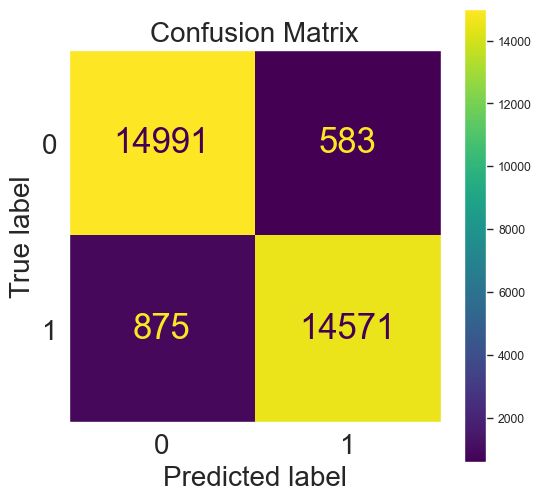

In [170]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(stacked_clf, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [171]:
metric_stacked_clf = {}
metric_stacked_clf['model_name'] = 'Stacked Classifier'
metric_stacked_clf['TN'] = stacked_clf_confusion_matrix[0]
metric_stacked_clf['FP'] = stacked_clf_confusion_matrix[1]
metric_stacked_clf['FN'] = stacked_clf_confusion_matrix[2]
metric_stacked_clf['TP'] = stacked_clf_confusion_matrix[3]

metric_stacked_clf['model'] = stacked_clf

In [172]:
metric_stacked_clf

{'model_name': 'Stacked Classifier',
 'TN': 14991,
 'FP': 583,
 'FN': 875,
 'TP': 14571,
 'model': StackingClassifier(estimators=[('cb',
                                 <catboost.core.CatBoostClassifier object at 0x000001796645E220>),
                                ('lgbm', LGBMClassifier())],
                    final_estimator=LogisticRegression())}

In [298]:
from sklearn.ensemble import StackingClassifier
estimators = [('xgb', xgb.XGBClassifier(colsample_bytree= 0.8916688336995001,learning_rate = 0.15421546885407916,max_depth = 7,min_child_weight = 4,n_estimators = 387,subsample = 0.7577979368881429)),
('gbc', GradientBoostingClassifier(n_estimators = 200,min_samples_split = 5,min_samples_leaf = 2,max_features = 'auto',max_depth = 20,learning_rate = 0.2))]

stacked_clf_tuned = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacked_clf_tuned.fit(X_train, y_train)

[22:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8916688336995001,
                                              gamma=None, gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.15421546885407916,
                                              max_delta_step=None, max_depth=7,
                                              min_child_weight=4, missing=nan,
                                              monotone_constra...
                                              num_parallel_tree=None,
                                              random_state=None, reg_

In [299]:
y_pred_stacked_clf_tuned = stacked_clf_tuned.predict(X_test)

In [300]:
stacked_clf_tuned_confusion_matrix = confusion_matrix(y_test, y_pred_stacked_clf_tuned).ravel()
stacked_clf_tuned_confusion_matrix

array([15174,   400,   721, 14725], dtype=int64)

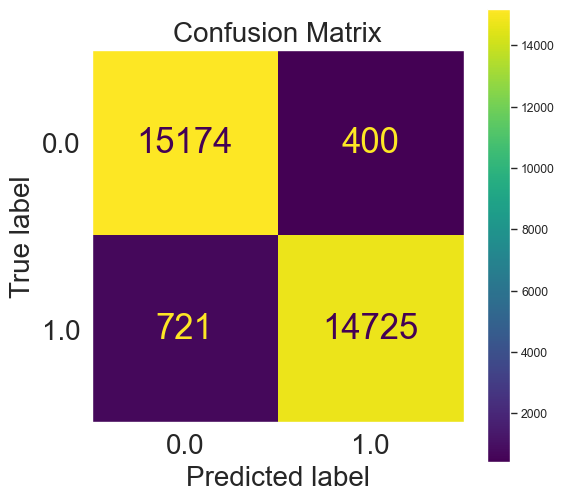

In [301]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(stacked_clf_tuned, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

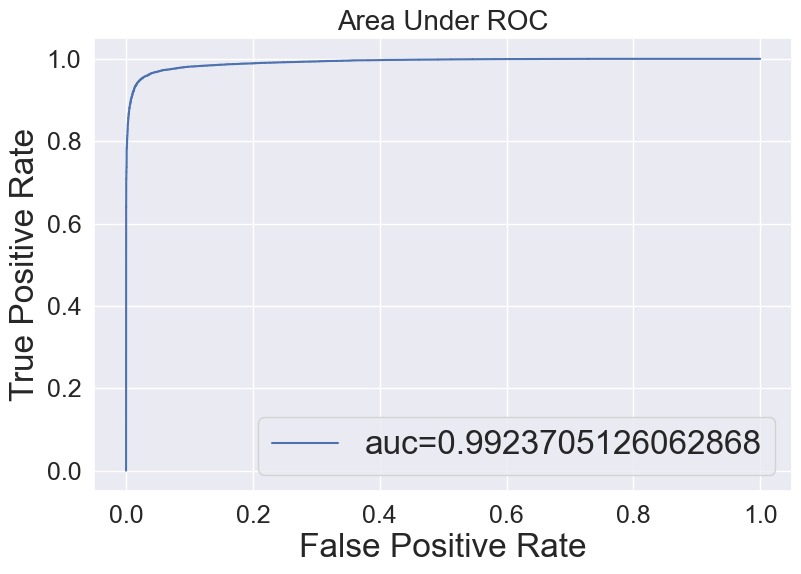

In [302]:
y_pred_proba = stacked_clf_tuned.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [303]:
stacked_clf_tuned.score

<bound method ClassifierMixin.score of StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8916688336995001,
                                              gamma=None, gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.15421546885407916,
                                              max_delta_step=None, max_depth=7,
                                              min_child_weight=4, missing=nan,
                                              monotone_constra...
                                              num_parallel_tree=None,
                              

#### Hyper-parameter Tuning

#### Evaluation Metrics

##### Accuracy

In [173]:
accuracy_score(y_test, y_pred_stacked_clf)

0.9529980657640232

##### Misclassification Rate

In [174]:
print("Classification Report: \n", classification_report(y_test, y_pred_stacked_clf)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     15574
           1       0.96      0.94      0.95     15446

    accuracy                           0.95     31020
   macro avg       0.95      0.95      0.95     31020
weighted avg       0.95      0.95      0.95     31020



##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

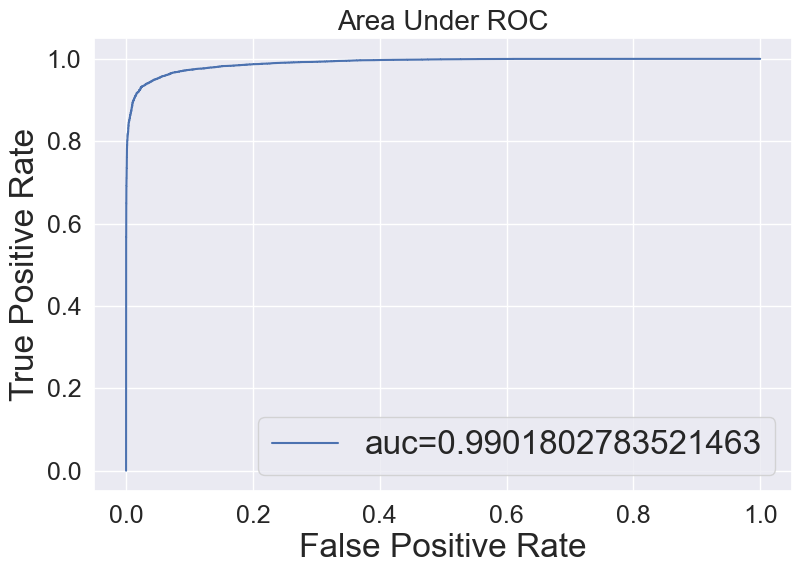

In [175]:
y_pred_proba = stacked_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

### Neural Network Classifier using Tensorflow

In [176]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [292]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [293]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during training')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during training')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [294]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)

Epoch 1/15
2262/2262 [==============================] - 10s 5ms/step - loss: 0.3411 - AUC: 0.9266 - val_loss: 0.2613 - val_AUC: 0.9561
Epoch 2/15
2262/2262 [==============================] - 10s 4ms/step - loss: 0.2850 - AUC: 0.9474 - val_loss: 0.2608 - val_AUC: 0.9600
Epoch 3/15
2262/2262 [==============================] - 10s 4ms/step - loss: 0.2714 - AUC: 0.9522 - val_loss: 0.2372 - val_AUC: 0.9639
Epoch 4/15
2262/2262 [==============================] - 10s 4ms/step - loss: 0.2588 - AUC: 0.9564 - val_loss: 0.2344 - val_AUC: 0.9661
Epoch 5/15
2262/2262 [==============================] - 10s 4ms/step - loss: 0.2432 - AUC: 0.9614 - val_loss: 0.2252 - val_AUC: 0.9673
Epoch 6/15
2262/2262 [==============================] - 10s 4ms/step - loss: 0.2336 - AUC: 0.9643 - val_loss: 0.2185 - val_AUC: 0.9687
Epoch 7/15
2262/2262 [==============================] - 10s 4ms/step - loss: 0.2256 - AUC: 0.9667 - val_loss: 0.2216 - val_AUC: 0.9681
Epoch 8/15
2262/2262 [==============================] -

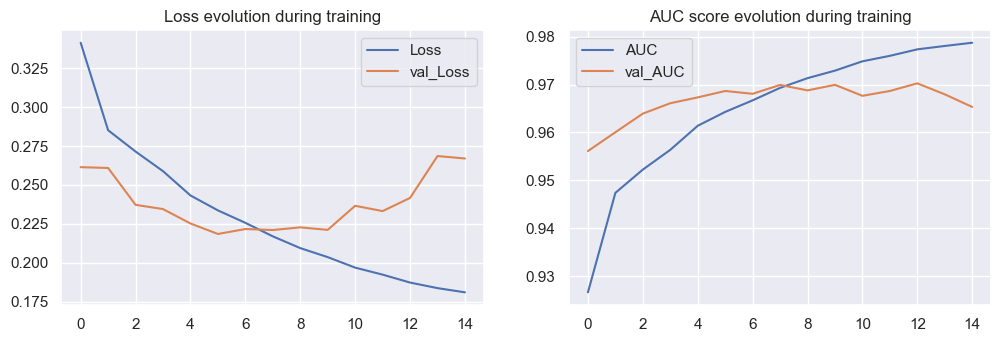

In [295]:
plot_learning_evolution(r)

In [296]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

Train Result:
Accuracy Score: 95.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.957022      0.945793  0.951326      0.951407      0.951397
recall         0.944915      0.957715  0.951326      0.951315      0.951326
f1-score       0.950930      0.951717  0.951326      0.951323      0.951324
support    36126.000000  36254.000000  0.951326  72380.000000  72380.000000
_______________________________________________
Confusion Matrix: 
 [[34136  1990]
 [ 1533 34721]]



In [297]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

Test Result:
Accuracy Score: 90.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.908444      0.908902  0.908672      0.908673      0.908672
recall         0.909786      0.907549  0.908672      0.908667      0.908672
f1-score       0.909114      0.908225  0.908672      0.908670      0.908671
support    15574.000000  15446.000000  0.908672  31020.000000  31020.000000
_______________________________________________
Confusion Matrix: 
 [[14169  1405]
 [ 1428 14018]]



In [183]:
# tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

In [ ]:
#### Modelling
#### Hyper-parameter Tuning

In [ ]:
#### Evaluation Metrics

In [ ]:
##### Accuracy

In [ ]:
##### Misclassification Rate

In [ ]:
##### Sensitivity

In [ ]:
##### Specificity

In [ ]:
##### F1 Score

In [ ]:
##### ROC and AUC – Area Under the Curve

In [184]:
gc.collect()  

24916

### Adaboost 

In [185]:
from sklearn.ensemble import AdaBoostClassifier

model_adab = AdaBoostClassifier(n_estimators=100, random_state=0)

In [186]:

model_adab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [187]:
y_pred_adab = model_adab.predict(X_test)

In [188]:
adab_confusion_matrix = confusion_matrix(y_test, y_pred_adab).ravel()
adab_confusion_matrix

array([14076,  1498,  1794, 13652], dtype=int64)

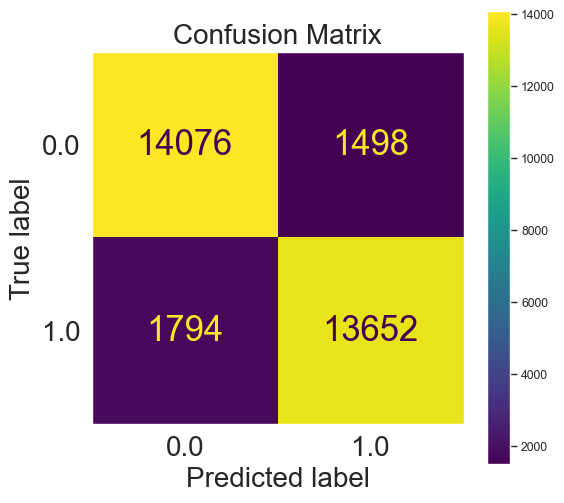

In [189]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_adab, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [190]:
metric_adab = {}
metric_adab['model_name'] = 'Adaboost'
metric_adab['TN'] = adab_confusion_matrix[0]
metric_adab['FP'] = adab_confusion_matrix[1]
metric_adab['FN'] = adab_confusion_matrix[2]
metric_adab['TP'] = adab_confusion_matrix[3]

metric_adab['model'] = model_adab

In [191]:
accuracy_score(y_test, y_pred_adab)

0.8938749194068343

In [192]:
print("Classification Report: \n", classification_report(y_test, y_pred_adab)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     15574
         1.0       0.90      0.88      0.89     15446

    accuracy                           0.89     31020
   macro avg       0.89      0.89      0.89     31020
weighted avg       0.89      0.89      0.89     31020



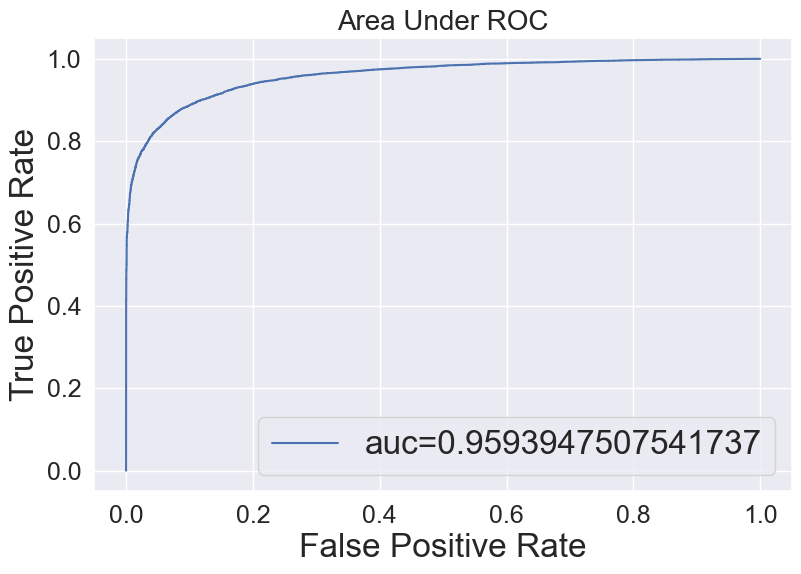

In [193]:
y_pred_proba = model_adab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [194]:
model_adab.get_params()   

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 0}

In [195]:

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [196]:
base_estimator__max_depth, base_estimator__min_samples_leaf, n_estimators, learning_rate

parameters_adab = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[i for i in range(2,25,2)],
              'n_estimators':[10,25, 50,100],
              'learning_rate':[0.01,0.02, 0.05, 0.1]}

# clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
# clf.fit(X_train,y_train)

In [197]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_AdaB_RSCV = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_AdaB_random = RandomizedSearchCV(estimator = model_AdaB_RSCV, param_distributions = parameters_adab, scoring = 'roc_auc', n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_AdaB_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 28.3min finished


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': [2, 4, 6,
                                                                      8, 10],
                                        'base_estimator__min_samples_leaf': [2,
                                                                             4,
                                                                             6,
                                                                             8,
                                                                             10,
                                                                             12,
                                                                             14,
                                                                             16,
                                           

In [198]:
y_pred_RSCV_AdaB = model_AdaB_random.predict(X_test)

In [199]:
RSCV_AdaB_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_AdaB).ravel()
RSCV_AdaB_confusion_matrix

array([15171,   403,   980, 14466], dtype=int64)

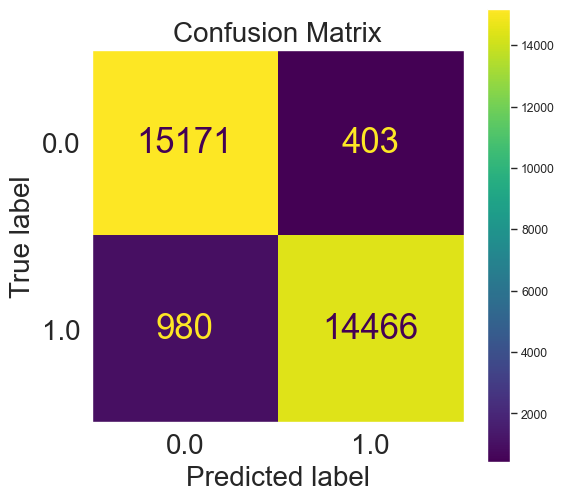

In [200]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_AdaB_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [201]:

accuracy_score(y_test, y_pred_RSCV_AdaB)

0.9554158607350097

In [202]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_AdaB)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     15574
         1.0       0.97      0.94      0.95     15446

    accuracy                           0.96     31020
   macro avg       0.96      0.96      0.96     31020
weighted avg       0.96      0.96      0.96     31020



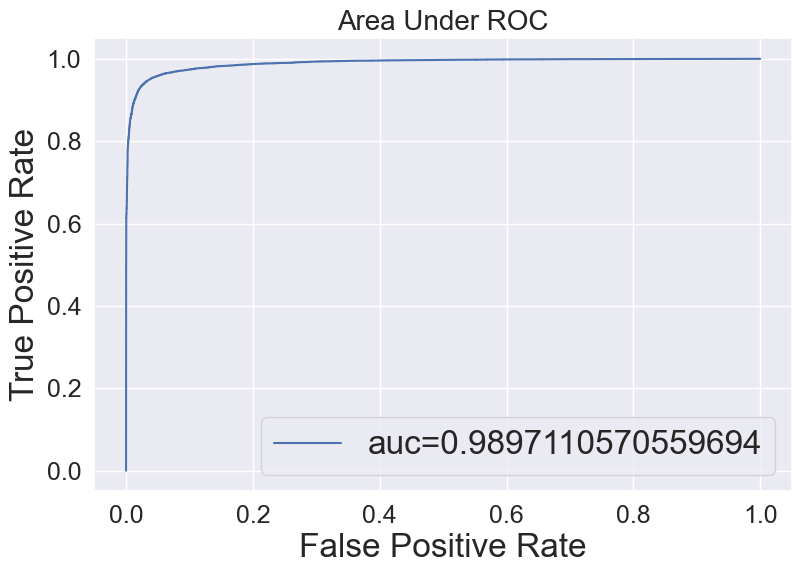

In [203]:
from sklearn import metrics
y_pred_proba = model_AdaB_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [204]:
model_AdaB_random.best_params_ 

{'n_estimators': 100,
 'learning_rate': 0.05,
 'base_estimator__min_samples_leaf': 24,
 'base_estimator__max_depth': 10}

In [205]:
model_AdaB_random.best_score_ 

0.9873918050340755

In [ ]:
### ExtraTreesClassifier 

In [206]:
from sklearn.ensemble import ExtraTreesClassifier

model_ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [207]:

model_ETC.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [208]:
y_pred_ETC = model_ETC.predict(X_test)

In [209]:
ETC_confusion_matrix = confusion_matrix(y_test, y_pred_ETC).ravel()
ETC_confusion_matrix

array([14921,   653,  1441, 14005], dtype=int64)

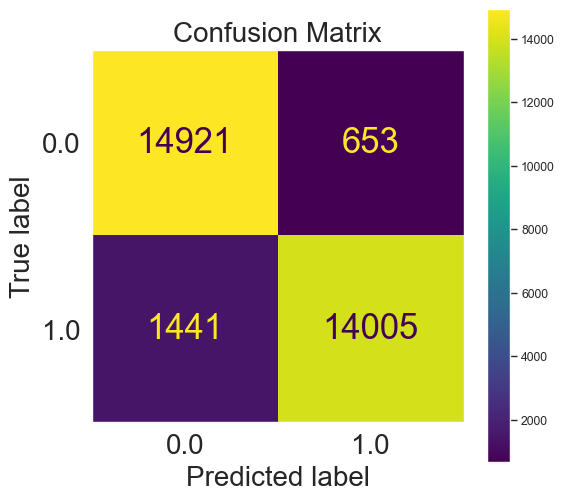

In [210]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_ETC, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [211]:
metric_ETC = {}
metric_ETC['model_name'] = 'ExtraTreesClassifier'
metric_ETC['TN'] = ETC_confusion_matrix[0]
metric_ETC['FP'] = ETC_confusion_matrix[1]
metric_ETC['FN'] = ETC_confusion_matrix[2]
metric_ETC['TP'] = ETC_confusion_matrix[3]

metric_ETC['model'] = model_ETC

In [212]:
accuracy_score(y_test, y_pred_ETC)

0.932495164410058

In [213]:
print("Classification Report: \n", classification_report(y_test, y_pred_ETC)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     15574
         1.0       0.96      0.91      0.93     15446

    accuracy                           0.93     31020
   macro avg       0.93      0.93      0.93     31020
weighted avg       0.93      0.93      0.93     31020



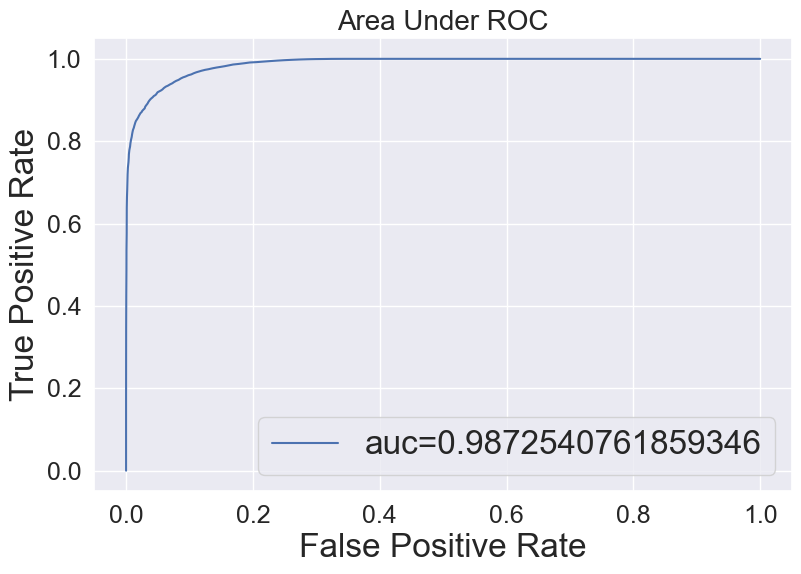

In [214]:
y_pred_proba = model_ETC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [215]:
model_ETC.get_params() 

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [216]:
parameters_ETC = {'n_estimators':[10,25,50,100, 200],
                  'max_depth': [1,2,5,3,5,8,10,16],
                  'min_samples_leaf':[i for i in range(2,25,2)]
                 
                 }

# parameters_ETC = {'base_estimator__max_depth':[i for i in range(2,11,2)],
#               'base_estimator__min_samples_leaf':[i for i in range(2,25,2)],
#               'n_estimators':[10,50,100, 200, 250,500, 1000],
#               'learning_rate':[0.01,0.1]}

# clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
# clf.fit(X_train,y_train)

In [217]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_ETC_RSCV = ExtraTreesClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_ETC_random = RandomizedSearchCV(estimator = model_ETC_RSCV, param_distributions = parameters_ETC, scoring = 'roc_auc', n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_ETC_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 5, 3, 5, 8, 10, 16],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20, 22,
                                                             24],
                                        'n_estimators': [10, 25, 50, 100, 200]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [218]:
y_pred_RSCV_ETC = model_ETC_random.predict(X_test)

In [219]:
RSCV_ETC_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_ETC).ravel()
RSCV_ETC_confusion_matrix

array([14023,  1551,  1888, 13558], dtype=int64)

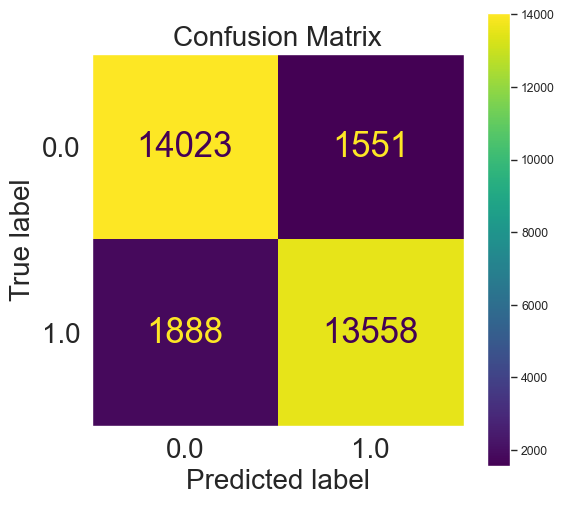

In [220]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_ETC_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [221]:

accuracy_score(y_test, y_pred_RSCV_ETC)

0.8891360412637008

In [222]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_ETC)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     15574
         1.0       0.90      0.88      0.89     15446

    accuracy                           0.89     31020
   macro avg       0.89      0.89      0.89     31020
weighted avg       0.89      0.89      0.89     31020



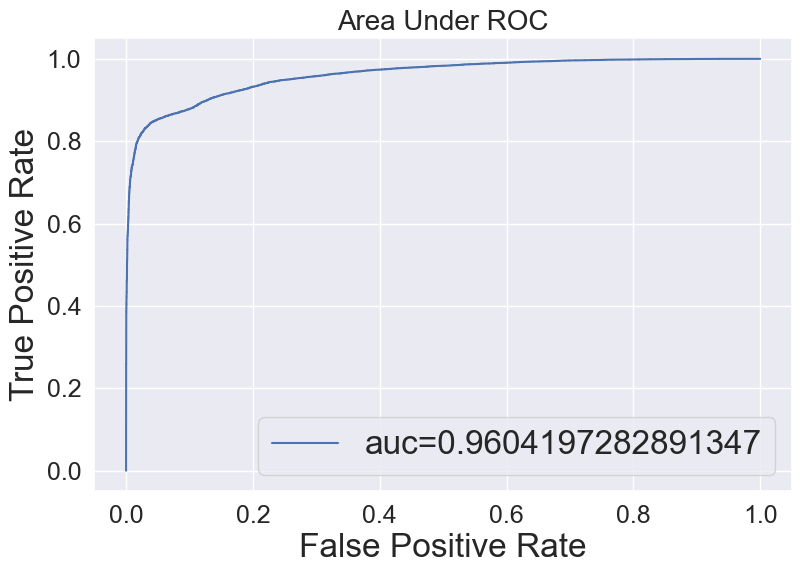

In [223]:
from sklearn import metrics
y_pred_proba = model_ETC_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [224]:
model_ETC_random.best_params_ 

{'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 16}

In [225]:
### GradientBoostingClassifier 

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [227]:

model_GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [228]:
y_pred_GBC = model_GBC.predict(X_test)

In [229]:
GBC_confusion_matrix = confusion_matrix(y_test, y_pred_GBC).ravel()
GBC_confusion_matrix

array([14365,  1209,  1912, 13534], dtype=int64)

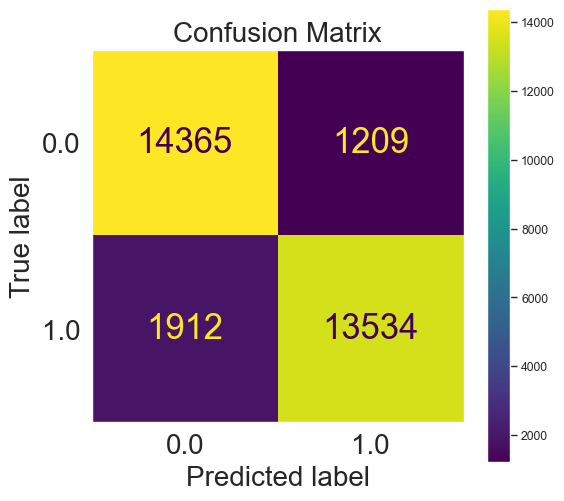

In [230]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_GBC, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [231]:
metric_GBC = {}
metric_GBC['model_name'] = 'GradientBoostingClassifier'
metric_GBC['TN'] = GBC_confusion_matrix[0]
metric_GBC['FP'] = GBC_confusion_matrix[1]
metric_GBC['FN'] = GBC_confusion_matrix[2]
metric_GBC['TP'] = GBC_confusion_matrix[3]

metric_GBC['model'] = model_GBC

In [232]:
accuracy_score(y_test, y_pred_GBC)

0.8993874919406835

In [233]:
print("Classification Report: \n", classification_report(y_test, y_pred_GBC)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     15574
         1.0       0.92      0.88      0.90     15446

    accuracy                           0.90     31020
   macro avg       0.90      0.90      0.90     31020
weighted avg       0.90      0.90      0.90     31020



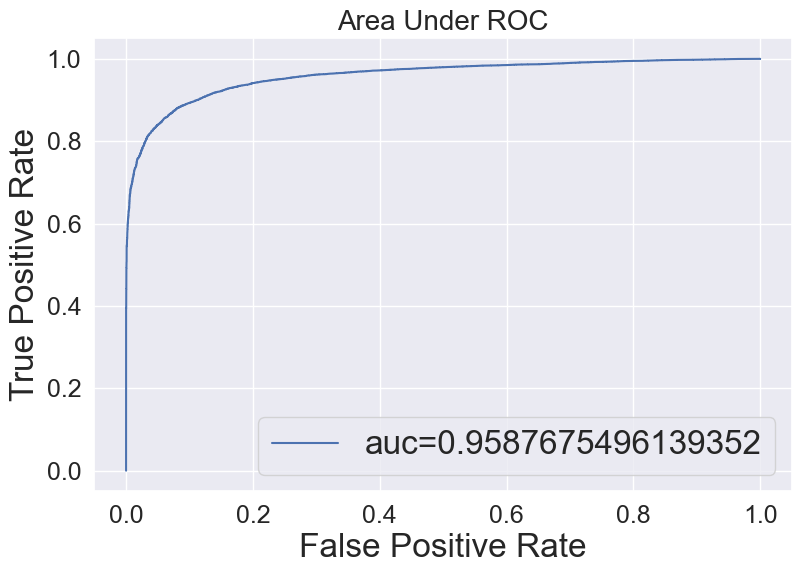

In [234]:
y_pred_proba = model_GBC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [235]:
model_GBC.get_params()  

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [236]:

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# #bootstrap = [True, False]
# # Create the random grid
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
params_GBC = {'max_depth': [10, 20, 30, 40, 50],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [10, 20, 25, 50, 100, 200],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5,1.0]}
              

In [237]:
gc.collect()  

35038

In [238]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_GBC_RSCV = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_GBC_random = RandomizedSearchCV(estimator = model_GBC_RSCV, param_distributions = params_GBC, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_GBC_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 63.6min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.2, 0.3, 0.5, 1.0],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 25, 50, 100,
                                                         200]},
                   random_state=42, verbose=2)

In [239]:
y_pred_RSCV_GBC = model_GBC_random.predict(X_test)

In [240]:
RSCV_GBC_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_GBC).ravel()
RSCV_GBC_confusion_matrix

array([15236,   338,   770, 14676], dtype=int64)

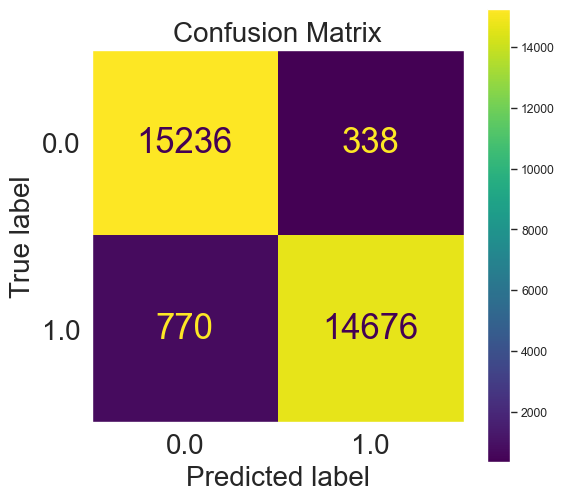

In [241]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_GBC_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [242]:

accuracy_score(y_test, y_pred_RSCV_GBC)

0.9642811089619601

In [243]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_GBC)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     15574
         1.0       0.98      0.95      0.96     15446

    accuracy                           0.96     31020
   macro avg       0.96      0.96      0.96     31020
weighted avg       0.96      0.96      0.96     31020



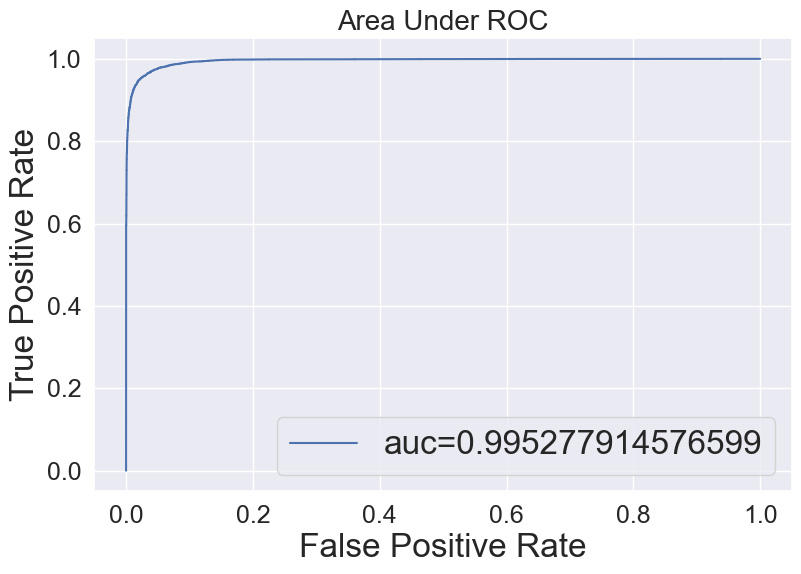

In [244]:
from sklearn import metrics
y_pred_proba = model_GBC_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [245]:
model_GBC_random.best_params_ 

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'learning_rate': 0.2}

In [246]:
### BaggingClassifier

In [247]:
gc.collect() 

7112

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.svm import SVC

# model_BagC = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)

In [ ]:

# model_BagC.fit(X_train, y_train)

In [ ]:
# y_pred_BagC = model_BagC.predict(X_test)

In [ ]:
# BagC_confusion_matrix = confusion_matrix(y_test, y_pred_BagC).ravel()
# BagC_confusion_matrix

In [ ]:

# sns.set(rc={'figure.figsize':(6,6)})
# sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

# plot_confusion_matrix(model_BagC, X_test, y_test) 
# plt.grid(False)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.title('Confusion Matrix', fontsize = 20)
# plt.show()

In [ ]:
# metric_BagC = {}
# metric_BagC['model_name'] = 'BaggingClassifier'
# metric_BagC['TN'] = BagC_confusion_matrix[0]
# metric_BagC['FP'] = BagC_confusion_matrix[1]
# metric_BagC['FN'] = BagC_confusion_matrix[2]
# metric_BagC['TP'] = BagC_confusion_matrix[3]

# metric_BagC['model'] = model_BagC

In [ ]:
# accuracy_score(y_test, y_pred_BagC)

In [ ]:
# print("Classification Report: \n", classification_report(y_test, y_pred_BagC)) 

In [ ]:
# y_pred_proba = model_BagC.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)



# import matplotlib.pyplot as plt 
# sns.set(rc={'figure.figsize':(9,6)})
# plt.plot(fpr,tpr,label="auc="+str(auc))

# font1 = {'size': 24}
# plt.xlabel('False Positive Rate', fontdict=font1)
# plt.ylabel('True Positive Rate', fontdict=font1)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.title('Area Under ROC', fontsize = 20)
# plt.legend(prop={"size":24})  
# plt.show()

In [248]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

model_BagC = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)

In [249]:

model_BagC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [250]:
y_pred_BagC = model_BagC.predict(X_test)

In [251]:
BagC_confusion_matrix = confusion_matrix(y_test, y_pred_BagC).ravel()
BagC_confusion_matrix

array([15245,   329,  1286, 14160], dtype=int64)

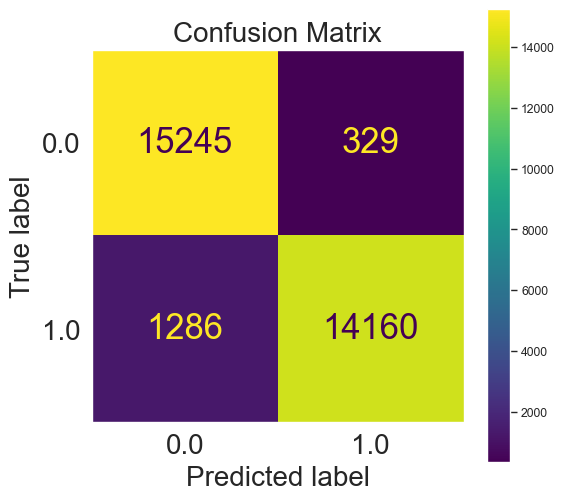

In [252]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_BagC, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [253]:
metric_BagC = {}
metric_BagC['model_name'] = 'BaggingClassifier'
metric_BagC['TN'] = BagC_confusion_matrix[0]
metric_BagC['FP'] = BagC_confusion_matrix[1]
metric_BagC['FN'] = BagC_confusion_matrix[2]
metric_BagC['TP'] = BagC_confusion_matrix[3]
 
metric_BagC['model'] = model_BagC

In [254]:
accuracy_score(y_test, y_pred_BagC)

0.9479368149580916

In [255]:
print("Classification Report: \n", classification_report(y_test, y_pred_BagC)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     15574
         1.0       0.98      0.92      0.95     15446

    accuracy                           0.95     31020
   macro avg       0.95      0.95      0.95     31020
weighted avg       0.95      0.95      0.95     31020



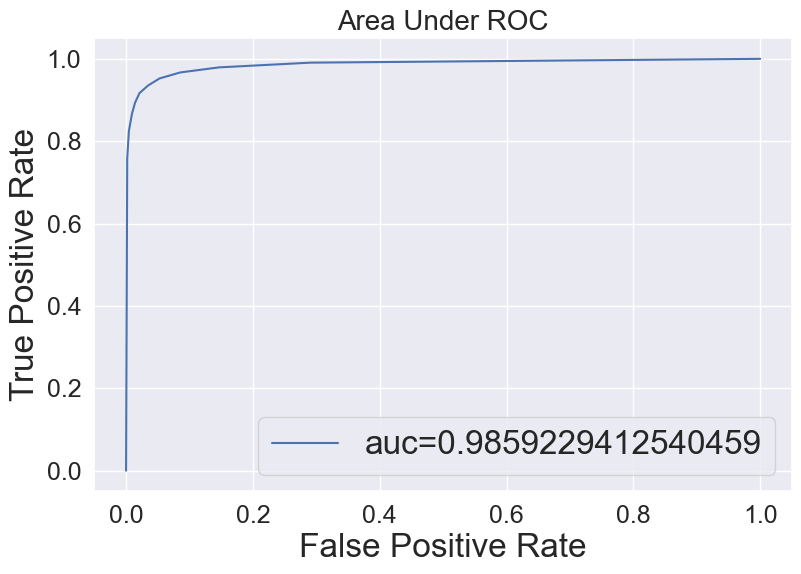

In [256]:
y_pred_proba = model_BagC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [257]:
model_BagC.get_params()  

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [258]:

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0, 2.0, 3.0, 4.0, 5.0]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid_BagC = {'max_features': max_features,
               'base_estimator__max_depth': max_depth,
               'base_estimator__min_samples_split': min_samples_split,
               'base_estimator__min_samples_leaf': min_samples_leaf,
                'n_estimators': [10, 20, 25, 50, 100]}
#'n_estimators': n_estimators,
#'bootstrap': bootstrap
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [259]:
model_BagC_RSCV = BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [260]:
model_BagC_RSCV.get_params()  

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [261]:
gc.collect() 

7091

In [262]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_BagC_RSCV = BaggingClassifier(base_estimator=DecisionTreeClassifier())
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_BagC_random = RandomizedSearchCV(estimator = model_BagC_RSCV, param_distributions = random_grid_BagC, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_BagC_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.4min finished


RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': [10, 20,
                                                                      30, 40,
                                                                      50, 60,
                                                                      70, 80,
                                                                      90, 100,
                                                                      110,
                                                                      None],
                                        'base_estimator__min_samples_leaf': [1,
                                                                             2,
                                                                             4],
                                        'base_estimator__min_

In [263]:
y_pred_RSCV_BagC = model_BagC_random.predict(X_test)

In [264]:
RSCV_BagC_confusion_matrix = confusion_matrix(y_test, y_pred_RSCV_BagC).ravel()
RSCV_BagC_confusion_matrix

array([15223,   351,  1102, 14344], dtype=int64)

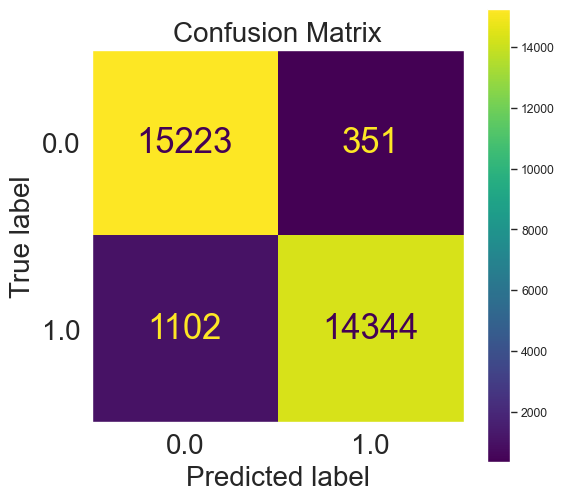

In [265]:

sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":40,"axes.labelsize":20}) 

plot_confusion_matrix(model_BagC_random, X_test, y_test) 
plt.grid(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [266]:

accuracy_score(y_test, y_pred_RSCV_BagC)

0.9531592520954223

In [267]:

print("Classification Report: \n", classification_report(y_test, y_pred_RSCV_BagC)) 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     15574
         1.0       0.98      0.93      0.95     15446

    accuracy                           0.95     31020
   macro avg       0.95      0.95      0.95     31020
weighted avg       0.95      0.95      0.95     31020



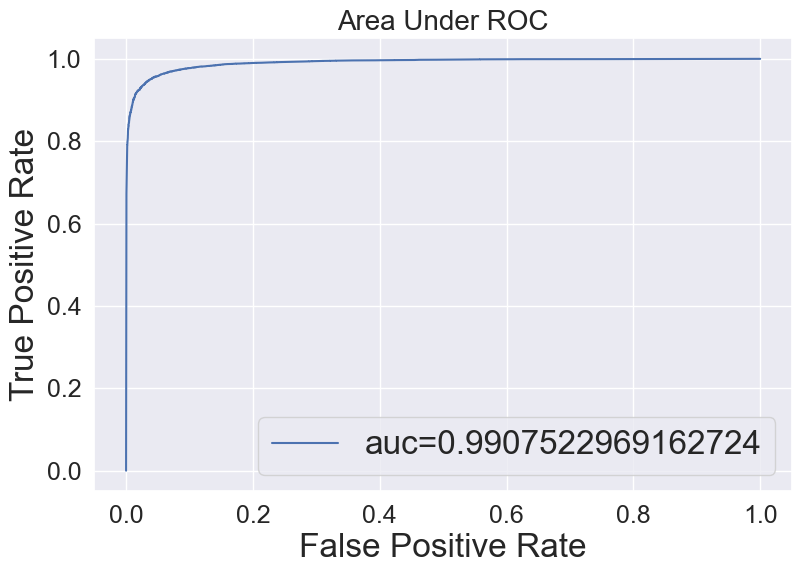

In [268]:
from sklearn import metrics
y_pred_proba = model_BagC_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(9,6)})
plt.plot(fpr,tpr,label="auc="+str(auc))

font1 = {'size': 24}
plt.xlabel('False Positive Rate', fontdict=font1)
plt.ylabel('True Positive Rate', fontdict=font1)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Area Under ROC', fontsize = 20)
plt.legend(prop={"size":24})  
plt.show()

In [291]:
model_BagC_random.best_params_ 

{'n_estimators': 50,
 'max_features': 1.0,
 'base_estimator__min_samples_split': 5,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__max_depth': 30}